<h1>Краткое описание проекта</h1>

<b>Описание проекта</b><br>
В интернет-магазине, продающем по всему миру компьютерные игры, имеются доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимр выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
<b>Цель проекта:</b> выявить закономерности, определяющие успешность игры и потенциально популярный продукт, и дать рекомендации для проведения  рекламной кампании <br>
<br>
<b>Задачи проекта: </b><br>
    <ol>
        <li>Выявить ошибки в данных и подготовить датасет к анализу</li>
        <li>Определить актуальный для проведения анализа период</li>
        <li>Определить актуальный для проведения анализа период</li>
        <li>Определить наиболее популярные платформы по всему миру и тенденции к изменению</li>
        <li>Определить наиболее прибыльные жанры по всему миру</li>
        <li>Определить для каждого региона (Северная Америка, Европа, Япониия) наиболее прибыльные платформы и жанры, а также оценить влияние рейтинга ESRB на продажи в каждом регионе</li>
        <li>Проверить гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"</li>
        <li>Проверить гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."</li>
        <li>Сделать общий вывод</li>
    </ol>
<br>
    
<b>Краткое описание данных: </b><br>
Таблица, содержащая информацию о продажах и рейтингах игр. Содержит следующие столбцы:<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<br>

<h1>Открытие файл и предобработка данных</h1>

In [1]:
import pandas as pd
import numpy as np
import calendar
import warnings
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from scipy import stats as st

In [2]:
#откроем файл и выведем первые 10 строк
games = pd.read_csv('/datasets/games.csv')
display(games.head(10))
#произведем замену названий столбцов 
games.columns = games.columns.str.lower()
#выведем общую информацию о датасете
games.info()
#Выведем уникальные значения в столюце rating, чтобы понять, какой тип данных должен быть в данном столбце. 
print(games['rating'].unique())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


<b>Вывод</b><br>
Названия столбцов датафрейма заменены: преобразованы к нижнему регистру для удобства работы с данными
В таблице имеется достаточно большое количество пропусков в столбцах рейтинга: critic_score, user_score и rating. Вероятно, они довольно часто встречаются для одних и тех же строк. <br>
В столбцах name и genre содержится по 2 пропуска: вполне возможно, что они содержатся для одних и тех же записей: это необходимо проверить, возможно,записи не содержат вообще никакой полезной информации и их можно удалить<br>
В столбце year_of_release содержится достаточно большое количество пропусков (около 300): также необходимо отдельно изучить эти записи
В таблице также довольно много ошибок типов данных:<br>
1. в столбце year_of_release тип данных - float64, но там содержится информация о годе выпуска игры: тип данных должен быть либо datetime, либо int
2. В столюцах critic_score и user_score данные должны быть числовыми - float64, однако тип данных user_score - object. его также необходимо заменить.



<h4>Поиск дубликатов, заполнение значений и преобразование типа данных столбца year_of_release</h4>

Для начала приведем все строковые значения к нижнему регистру, а также посмотрим, в каких строках пропущен год:

In [3]:
#для избежания ошибок дублировния приведем к нижнему регистру значения в столбцах 'name' и 'genre'
games['name'] = games['name'].str.lower()
games['genre'] = games['genre'].str.lower()

 
#Просмотрим строки, где пропушены значения в year_of_release
display(games.query('not (year_of_release > 0)').head(20))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,Wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,Wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Выведем некоторые срезы из талицы по играм, где пропущен год:

In [4]:
#выведем срезы изтаблицы по некоторым именам видеоигр, где есть пропуски в столбце year_of_release:
display(games.query('name == "madden nfl 2004"'))
display(games.query('name == "fifa soccer 2004"'))
display(games.query('name == "space invaders"'))

#можно видеть, что есть игры, выпущенные на нескольких платформах, где почти везде указан год выпуска и он одинаковый. Вероятнее всего, для тех платформ, где год выпуска пропущен, он будет таким же
#вызовем функцию, которая для таких игр (выпущенных на нескольких платформах)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,XB,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,GC,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,GBA,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,space invaders,SNES,1994.0,shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,space invaders,N64,1999.0,shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,space invaders,GBA,2002.0,shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Можно видеть, что есть игры, выпущенные на разных платформах, и для всех остальных платформ указан один год. Для таких игр мы можем заменить пропущенное значение года.
Однако, есть игры, где для игр с одинаковым названием указаны разные годы выпуска. Для них заполнять не будем

In [5]:
#посчитаем минимальный и максимальный год для каждой игры
games['max_year'] = games.groupby('name')['year_of_release'].transform('max')
games['min_year'] = games.groupby('name')['year_of_release'].transform('min')
#заполним пропуски там, где минимальный и максимальный годы одинаковы:
games['year_of_release'] = np.where(np.logical_and(games['max_year'] == games['min_year'], games['year_of_release'].isna() == True),games['max_year'],games['year_of_release'])
#удалим более ненужные столбцы 
games = games.drop('max_year',1)
games = games.drop('min_year',1)
#выведем некоторые контрольные значения и общую информацию об измененной таблице
print('Срез по fifa soccer 2004')
display(games.query('name == "fifa soccer 2004"'))
print('Срез по space invaders')
display(games.query('name == "space invaders"'))
print('Общая информация о games')
games.info()

Срез по fifa soccer 2004


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,PS2,2003.0,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,XB,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,GC,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,GBA,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Срез по space invaders


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,space invaders,SNES,1994.0,shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,space invaders,N64,1999.0,shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,space invaders,GBA,2002.0,shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Общая информация о games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16557 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таким образом год заполен в 111 строках. Посмотрим, что у нас осталось:

In [6]:
#выведем первые 10 строк среза по пропущенным значениям в year_of_release
games[games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,rock band,Wii,NaN,misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,rock band,PS3,NaN,misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1301,triple play 99,PS,NaN,sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN
1506,adventure,2600,NaN,adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,combat,2600,NaN,action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
1699,hitman 2: silent assassin,XB,NaN,action,0.76,0.38,0.0,0.05,84.0,8,M


Можно видеть, что есть строки, в которых указан год. Как правило, такое действительно бывает, но фактически указывают год, следующий за реальным годом выпуска. Например, "wwe smackdown vs. raw 2006" была выпущена в 2005 году. 
Посмотрим, какие  есть игры, где не заполнен год, и указан в наименовании. 
В наименовании год может быть указан 2 способами: четырехзначным (например, 1990, 2005 и тд), либо двухзначным (например, 95, 90, 99). Рассмотрим все возможные варианты.

In [7]:
def extract_year(column_name,extract_string): #функция, извлекающя из name определенную строку и заисывающая результат в заданный столбец. 
    games[column_name] = games['name'].str.extract(extract_string) #найдем заданную последовательность символов в столбце name
    games[column_name] = pd.to_numeric(games[column_name])#преобразуем формат даных в столбце
    games[column_name] = games[column_name].fillna(0)#заполним пропуски нулями для корректности математических операций

#найдем наименования, где год указан в четырехзначном и двузначном формате:

extract_year('extracted_year','(20\d{2})')
extract_year('extracted_year_19','(19\d{2})')
extract_year('extracted_year_short_90','( 9\d{1})')
extract_year('extracted_year_short_80','( 8\d{1})')
#приведем все в один столбец и удалим ненужные столбцы
games['extracted_year'] = games['extracted_year'] + games['extracted_year_short_90'] + games['extracted_year_short_80'] + games['extracted_year_19']
games = games.drop('extracted_year_short_90',1)
games = games.drop('extracted_year_short_80',1)
games = games.drop('extracted_year_19',1)
#выведем строки, в которых удалось вытащить год из названия
games[games['year_of_release'].isna() & games['extracted_year'] > 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
1301,triple play 99,PS,NaN,sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,99.0
2572,pes 2009: pro evolution soccer,PSP,NaN,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009.0
4775,nfl gameday 2003,PS2,NaN,sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2003.0
5336,tomb raider (2013),PC,NaN,action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.0
5655,all-star baseball 2005,PS2,NaN,sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2005.0
8918,all-star baseball 2005,XB,NaN,sports,0.11,0.03,0.00,0.01,75.0,8.8,E,2005.0
12046,drake of the 99 dragons,XB,NaN,shooter,0.05,0.01,0.00,0.00,22.0,1.8,T,99.0
13195,tour de france 2011,X360,NaN,racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN,2011.0
13929,sega rally 2006,PS2,NaN,racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,2006.0


Практически для всех игр, за исключением "drake of the 99 dragons" указанные в наименовании цифры связаны с годом выпуска. И практически для всех игр указанный год выпуска на 1 больше фактического, искючение составляют:
<li>tomb raider (2013) - здесь указанный год даже не часть наименования. это просто год выпуска в скобках</li>
<li>tour de france 2011 - единственная игра из всех, что здесь есть, для которой в наименовании указан реальный год выпуска</li>
Произведем соответствующие замены:

In [8]:
#осуществим замены: строки-исключения можно заменить по индексу, остальное - функцией fillna
games.loc[12046,'year_of_release'] = 0
games.loc[13195,'year_of_release'] = 2011
games.loc[5336,'year_of_release'] = 2013
games['year_of_release'] = games['year_of_release'].fillna(games['extracted_year'] - 1)
games['year_of_release'] = np.where(games['year_of_release'] == -1,0,games['year_of_release'])
games = games.drop('extracted_year',1)#удалим более не нужный столбец
#Выведем срезы по некоторым наименованиям:
display(games.query('name == "drake of the 99 dragons"'))
display(games.query('name == "tomb raider (2013)"'))
display(games.query('name == "football manager 2007"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12046,drake of the 99 dragons,XB,0.0,shooter,0.05,0.01,0.0,0.0,22.0,1.8,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
646,tomb raider (2013),PS3,2013.0,action,0.60,1.26,0.08,0.48,NaN,NaN,NaN
910,tomb raider (2013),X360,2013.0,action,0.86,0.84,0.01,0.17,NaN,NaN,NaN
1384,tomb raider (2013),PS4,2014.0,action,0.47,0.65,0.06,0.22,NaN,NaN,NaN
3309,tomb raider (2013),XOne,2014.0,action,0.35,0.21,0.00,0.05,NaN,NaN,NaN
5336,tomb raider (2013),PC,2013.0,action,0.06,0.25,0.00,0.04,86.0,8.5,M


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16079,football manager 2007,X360,2006.0,sports,0.0,0.01,0.0,0.0,NaN,NaN,NaN


Замены произведены. Можно заполнить оставшиеся пропуски нулями и преобразовать тип данных

In [9]:
#для простоты обработки и преобразования в int заменим пропущенные значения значением по умолчанию - нулями    
games['year_of_release'].fillna(0, inplace = True)
games['year_of_release'] = games['year_of_release'].astype('int')

print('Количество нулевых значений в year_of_release после преобразований: ',len(games.query('year_of_release == 0')))
print()
#выведем общую информацию после преобразований
print('Общая информация о таблице games после преобразования ')
print(games.info())

Количество нулевых значений в year_of_release после преобразований:  148

Общая информация о таблице games после преобразования 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


<b>Вывод:</b><br>
В столбце year_of_release 269 пропусков. Для некоторых игр год не указан вообще ни для какой платформы (например, rock band). Для других год выпуска может быть пропущен для одной или нескольких платформ. Вероятнее всего, это либо ошибка оператора, либо ошибка хранения или выгрузки данных. В любом случае, об этой ошибке необходимо сообщить в отдел разработки<br>
Можно обратить внимание на следующие факты:<br>
<ol>
<li> Есть игры, где в наименовании указан год. Как правило, это действительно привязано к году, но фактический год выпуска был на год раньше. Например, fifa soccer 2004 фактически была выпущена в 2003 году. На основании этой информации можно заполнить пропуски в тех строках, где в названии игры указан год.</li><br>
<li> Можно заметить, что есть игры, выпущенные на разных платформах: и для всхе платформ, за исключением 1-2, год выпуска одинаковый. Например, lego batman: the videogame. Для всех платформ, за исключением Wii и PSP игра выпущена в 2008 году. Вероятнее всего, для этих платформ игра был выпущена также в 2008 году, тем более, что обе платформы в том году уже существовали. Можно предположить, что если игра выпущена более чем для 2 платформ, и указан одинаковый год для всех платформ, кроме пропущенных значений,, то пропуск можно заполнить этим значением минус 1.</li><br>
</ol>  
Таким образом, были заполнены 121 пропуск. 
Формат year_of_release - float. Формат не очень удобен для восприятия, поэтому был изменен на int (в формате datetime также не слишком удобная форма представляения). 

In [10]:
games_test = pd.read_csv('/datasets/games.csv')
games_test.columns = games_test.columns.str.lower()
games_test['name'] = games_test['name'].str.lower()

games_test.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
display(games_test.query('name == "madden nfl 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [12]:
games_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1. Заполнение поля года по играм, по которым этот год стоит, но по другим платформам.

In [13]:
# группируем по названию игры
# берем столбец года выпуска
# применяем функцию - если встречаем пропуск, то заполняем его минимальным значением по группе (по названию игры)
# (функция min взята, чтобы определить любое значение, отличное от NaN - можно было взять и max, и mean, и median)
games_test['year_of_release'] = games_test.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.min()))

In [14]:
display(games_test.query('name == "madden nfl 2004"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [15]:
games_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16567 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
games_test[games_test['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
659,NaN,GEN,NaN,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN
805,rock band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T


2. Заполнение поля года, если сам год присутствует в названии игры.

In [17]:
games_test['extracted_year'] = games_test['name'].str.extract('(19|20\d{2})')

games_test['extracted_year'] = games_test['extracted_year'].astype('float').astype('Int32')

games_test['year_of_release'] = games_test['year_of_release'].fillna(games_test['extracted_year'])

In [18]:
display(games_test['year_of_release'].min())
display(games_test['year_of_release'].max())

1980.0

2016.0

In [19]:
games_test['year_of_release'] = np.where(np.logical_and(games_test['year_of_release']>=1980, 
                                                        games_test['year_of_release']<=2016),
                                         games_test['year_of_release'],
                                         np.NaN)

In [20]:
games_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16574 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
extracted_year     867 non-null Int32
dtypes: Int32(1), float64(6), object(5)
memory usage: 1.5+ MB


<h4>Обработка значений и преобразование типа данных в столбцах рейтинга</h4>

In [21]:
#рассмотрим уникальные значения в столбцах critic_score, user_score и rating
print('Уникальные значения critic_score: ',games['critic_score'].sort_values().unique())
print('Уникальные значения user_score: ',games['user_score'].sort_values().unique())
print('Уникальные значения rating: ',games['rating'].sort_values().unique())
#в столбце user_score присутствует аббревиатура tbd, выведем ее значения
display(games.query('user_score == "tbd"'))
#в столбце user_score присутсвует нулевое значенния, выведим такие строки
display(games.query('user_score == "0"'))
#значения tbd в столбце user_score - означают to be determined: значит, это значение еще не посчитано. 
#Ввиду того, что необходимо буде ананлизировать звисимость продаж от оценок критиков и пользователей, значения в столбце user_score должны быть числовыми
#известно, что в столбце user_score значения не должны превышать 10. Можно заменить значение tbd любым значением выше этого. Например, 100
#проведем замену 
games["user_score"].replace("tbd","100",inplace = True)
#преобразуем тип данных в столбце user_score на float
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'ignore')
#выведем список уникальных значений в столбце user_score
print('Уникальные значения user_score: ',games['user_score'].sort_values().unique())
print('Строки, с пропущенными значениями в столбцах рейтинга критиков и пользователей: ')
display(games.query('critic_score.isnull() == True and user_score.isnull()').sort_values(by = 'name').head(15))
games["rating"].fillna('Unknown', inplace = True)


Уникальные значения critic_score:  [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
Уникальные значения user_score:  ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
Уникальные значения ratin

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,Wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,GBA,0,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,GBA,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,GC,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,DS,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,DS,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,my little pony: pinkie pie's party,DS,2008,adventure,0.66,0.0,0.0,0.06,NaN,0,E


Уникальные значения user_score:  [  0.    0.2   0.3   0.5   0.6   0.7   0.9   1.    1.1   1.2   1.3   1.4
   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3   2.4   2.5   2.6
   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5   3.6   3.7   3.8
   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7   4.8   4.9   5.
   5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.2
   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1   7.2   7.3   7.4
   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5   8.6
   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7 100.
   nan]
Строки, с пропущенными значениями в столбцах рейтинга критиков и пользователей: 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,beyblade burst,3DS,2016,role-playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,fire emblem fates,3DS,2015,role-playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013,platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,frozen: olaf's quest,DS,2013,platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,haikyu!! cross team match!,3DS,2016,adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
4728,'98 koshien,PS,1998,sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8342,.hack//g.u. vol.1//rebirth,PS2,2006,role-playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7087,.hack//g.u. vol.2//reminisce,PS2,2006,role-playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8597,.hack//g.u. vol.2//reminisce (jp sales),PS2,2006,role-playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
8293,.hack//g.u. vol.3//redemption,PS2,2007,role-playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN


<b>Вывод:</b><br>
В столюцах рейтинга critic_score, user_score, rating довольно много пропущенных значений. Пропуски все за разные годы, для аболютно разных жанров, платформ, а также для игр разной популярности (например, игра fire emblem fates для 3DS: продажи по США - 0.81, когда среднее значение в столбце 0.26, то есть игра весьма популярна). Пропуски заменять не стала: некорректно заполнять эти данные на основе среднего или иного расчетного значения - это абсолютно категориальные данные. Не зная их, их заполнить невозможно<br>
Помимо прочего, обнаружено некорректное хранение данных: <br>
строка 7087 игра .hack//g.u. vol.2//reminisce для PS 2<br>
строка 8597 игра .hack//g.u. vol.2//reminisce (jp sales) для PS2<br>
Обе строки содержат сведения об одной и той же игре, только в отдельную строку выделены продажи в Японии. Ниже проверим все такие значения. Об этой ошибке необходимо сообщить в отдел разработки: было бы неплохо не допускать такого дублирования данных<br>
В столбце user_score тип данных - object, однако данные там числовые и будут нужны в дальнейшем для анализа. Поэтому они были преобразованы во float. Помимо числовых значений, в данном столбце есть значение tbd - to be determined: значения, которые еще не определены, но считаются. Для преобразования в числовой тип данных, это значение заменено на 100 - это число явно выходит за пределы допустимой оценки пользователей (она не более 10)<br>
В столбце rating содержится рейтинг ESRB. В наборе данных присутствуют следующие значения:<br>
<li>'AO' - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.</li>
<li>'E' - «Для всех»</li>
<li>'E10+' - «Для всех от 10 лет и старше»</li>
<li>'EC' - «Для детей младшего возраста»</li>
<li>'K-A' - "Для всех" - устаревший, переименован в E</li>
<li>'M' - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.</li>
<li>'RP' - «Рейтинг ожидается»</li>
<li>'T' - «Подросткам»: Игра подходит для лиц от 13 лет и старше</li>
Все пропущенные значения в столбце rating заменены на Unknown: позже это будет необходимо при получении ответа на вопрос о влиянии рейтинга ESRB на продажи в отдельном регионе

<h4>Поиск дубликатов и ошибок в столбцах platform, genre, name</h4>

Проверим, нет ли явных ошибок в столбцах platform, genre, а также посчитаем общее количество дубликатов в строках и количество дубликатов в строках по столбцам ['name','platform','year_of_release']

In [22]:
#для контроля ошибок дублирования выведем уникальные значения в столбцах platform и genre
print('Уникальные значения в столбце platform: ',games['platform'].unique())
print('Уникальные значения в столбце genre: ',games['genre'].unique())
#Посчитаем количество дубликатов в строках
print('Количество дубликатов в строках: ',games.duplicated().sum())
print()
#посчитаем количество дубликатов по трем столбцам ['name','platform','year_of_release']
print('Количество дубликатов в строках по столбцам name - platform  - year: ',games[['name','platform','year_of_release']].duplicated().sum())
print('Количество дубликатов в строках по столбцам name - platform - year: ',games[['name','platform','year_of_release']].duplicated().sum())


Уникальные значения в столбце platform:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения в столбце genre:  ['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]
Количество дубликатов в строках:  0

Количество дубликатов в строках по столбцам name - platform  - year:  2
Количество дубликатов в строках по столбцам name - platform - year:  2


Выведем строки-дубликаты

In [23]:
print('Дубликаты в строках по столбцам name - platform - year:')
print(games[['name','platform','year_of_release']].duplicated().sort_values().tail(2))
print('строки-дубликаты')
display(games.query('index == 16230 or index == 14244')) #выведем строки-дубликаты

Дубликаты в строках по столбцам name - platform - year:
16230    True
14244    True
dtype: bool
строки-дубликаты


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,Unknown
16230,madden nfl 13,PS3,2012,sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Можно увидеть, что есть строка-дубликат для для 16230 (игра madden nfl 13). Выведем срез по ней

In [24]:
print('Выведем дубликаты для строки без пропущенных значений')
display(games.query('name == "madden nfl 13" and platform == "PS3"')) #выведем строки для дублирующихся значений без пропусков

Выведем дубликаты для строки без пропущенных значений


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,PS3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Очевидно, что в строках 604 и 16230 общее все, кроме цифр по продажам. Соответственно, эти строки можно объединить в одну, сложив продажи:

In [25]:
#объединим дублирующиеся строки и удалим ненужную
try:
    games.loc[604,'na_sales'] = games.loc[604,'na_sales'] + games.loc[16230,'na_sales']
    games.loc[604,'eu_sales'] = games.loc[604,'eu_sales'] + games.loc[16230,'eu_sales']
    games.loc[604,'jp_sales'] = games.loc[604,'jp_sales'] + games.loc[16230,'jp_sales']
    games = games.drop(16230) #удалим лишнее
    display(games.query('name == "madden nfl 13" and platform == "PS3"')) #посмотрим на результат
except:
    print('Замена дублирующегося значения по строкам 604 и 16230 уже произведена')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,sports,2.11,0.23,0.0,0.23,83.0,5.5,E


В таблице также есть столбце name, в котором могут быть скрыты похожие значения, фактически создающие дубликаты. Посчитаем количество уникальных названий в столбце name, а также выведем часть отсортированных значений

In [26]:
#Посчитаем, сколько всего уникальных наименований игр в таблице:
all_names = games['name'].sort_values().unique()
print('количество уникальных значений в столбце name:', len(all_names))
print('Уникальные значения в столбце name:')
print(all_names[0:20]) #выведем первые 30 значений


количество уникальных значений в столбце name: 11560
Уникальные значения в столбце name:
[' beyblade burst' ' fire emblem fates' " frozen: olaf's quest"
 ' haikyu!! cross team match!' ' tales of xillia 2' "'98 koshien"
 '.hack//g.u. vol.1//rebirth' '.hack//g.u. vol.2//reminisce'
 '.hack//g.u. vol.2//reminisce (jp sales)' '.hack//g.u. vol.3//redemption'
 '.hack//infection part 1' '.hack//link' '.hack//mutation part 2'
 '.hack//outbreak part 3' '.hack//quarantine part 4: the final chapter'
 '.hack: sekai no mukou ni + versus' '007 racing' '007: quantum of solace'
 '007: the world is not enough' '007: tomorrow never dies']


Можно заметить, что среди уникальных значений появляются похожие названия названия, которые как бы выделяют в отдельную строку продажи в отдельном регионе. Например, такие:<br>
'.hack//g.u. vol.2//reminisce'<br>
'.hack//g.u. vol.2//reminisce' (jp sales)<br>
Найдем все такие строки

In [27]:
#Найдем все такие строки
doubled_names = [] #пустой список, куда будем записывать все похожие значения
for row in range(0,len(all_names) - 1): #проверяем каждое уникальное наименование
    try:
        #проверяем полное вхождение наменовния соседних строк отсортированного массива друг в друга и вхождение слов sales и version
        ind = all_names[row].find(all_names[row + 1])
        ind2 = all_names[row + 1].find(all_names[row])
        is_sales = all_names[row].find('sales')
        is_sales2 = all_names[row + 1].find('sales')
        is_version = all_names[row].find('version')
        is_version2 = all_names[row + 1].find('version')
        #если находим такие, добавляем в список
        if (ind >= 0 or ind2 >= 0) and (is_sales >= 0 or is_sales2 >= 0 or is_version >= 0 or is_version2 >= 0):
            doubled_names.append(all_names[row])
            doubled_names.append(all_names[row + 1])
    except:
        continue
    
print('Похожие значения в столбце name:')
print(doubled_names[0:20]) 
print()
print('Общее количество "похожих" значений: ', len(doubled_names))

Похожие значения в столбце name:
['.hack//g.u. vol.2//reminisce', '.hack//g.u. vol.2//reminisce (jp sales)', 'ape escape academy', 'ape escape academy (jp sales)', 'battlefield 2: modern combat', 'battlefield 2: modern combat(jp sales)', 'bleach: dark souls', 'bleach: dark souls (jp sales)', 'bomberman', 'bomberman (jp sales)', 'dance dance revolution: mario mix', 'dance dance revolution: mario mix (jp sales)', 'digimon world ds', 'digimon world ds (jp sales)', 'draglade', 'draglade (jp sales)', 'dragon ball z: budokai tenkaichi 2', 'dragon ball z: budokai tenkaichi 2 (jp sales)', 'dragon ball z: harukanaru densetsu', 'dragon ball z: harukanaru densetsu (jp sales)']

Общее количество "похожих" значений:  188


Можно видеть, что в датасете довольно много "похожих" значений. Рассмотрим на примере:

In [28]:
display(games.query('name == "ape escape academy" or name == "ape escape academy (jp sales)"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5455,ape escape academy,PSP,2004,misc,0.13,0.15,0.00,0.05,51.0,5.8,E10+
9249,ape escape academy (jp sales),PSP,2004,misc,0.00,0.00,0.13,0.00,NaN,NaN,Unknown


На выведенном выше примере видно, что в ape escape academy (jp sales) просто выведены в отдельную строку данные по продажам в Японии. логично такие строки объединять. 
Для начала произведем замену наименований в games. Уберем все с sales

In [29]:
#произведем замену наименований в датасете games
for i in range(0,len(doubled_names) - 1): 
    if doubled_names[i+1].find(doubled_names[i]) >= 0:
        games["name"] = games["name"].replace(doubled_names[i+1],doubled_names[i])
        meaning = doubled_names[i]
                
#посчитем снова общее количество дубликатов (оно могло измениться)
print('Количество дубликатов в строках: ',games.duplicated().sum())

print()
#посчитаем количество дубликатов по трем столбцам ['name','platform','year_of_release']
print('Количество дубликатов в строках по столбцам name - platform  - year - genre: ',games[['name','platform','year_of_release','genre']].duplicated().sum())


Количество дубликатов в строках:  0

Количество дубликатов в строках по столбцам name - platform  - year - genre:  68


Можно видеть, что появились новые дубликаты по комбинации столбцов name - platform  - year - genre. В таких строках произведем замену по следующему алгоритму:
Если в этих же строках одинаковые значения в столбцах user_csore, critic_score и rating (либо в некоторых строках значения в этих столбцах пропущены, а в остальных - одинаковы (количество таких дубликатов может быть больше 2)), тогда мы суммируем продажи по этим строкам и заполняем user_csore, critic_score и rating указанными значениями, дубликаты удаляем:

In [30]:

#рассмотрим строки с дубликатами по ['name','platform','year_of_release']
duplicated_games = games[['name','platform','year_of_release','genre']].duplicated()
#произведем замены по каждому дубликату:
for row in duplicated_games.loc[duplicated_games == True].index:
        row_games = games.query('index == @row')
        name = row_games.loc[row,'name']
        platform = row_games.loc[row,"platform"]
        year_of_release = row_games.loc[row,"year_of_release"]
        genre = row_games.loc[row,"genre"]
        #получим из датасета games все строки с данным дубликатом
        games_dupl = games.query('name == @name and platform == @platform and year_of_release == @year_of_release and genre == @genre')
        games_dupl = games_dupl.reset_index() #переиндексируем для удобства работы
        
        if len(games_dupl) > 0: #если дубликаты есть
            #суммируем все продажи, определяем рейтинги как максимальные, если нет разных ненулевых значений
            games_dupl.loc[0, 'na_sales'] = games_dupl['na_sales'].sum()
            games_dupl.loc[0, 'eu_sales'] = games_dupl['eu_sales'].sum()
            games_dupl.loc[0, 'jp_sales'] = games_dupl['jp_sales'].sum()
            games_dupl.loc[0, 'other_sales'] = games_dupl['other_sales'].sum()
            if len(games_dupl.query('critic_score > 0')['critic_score'].unique()) <= 1:
                games_dupl.loc[0, 'critic_score'] = games_dupl['critic_score'].max()
            else:
                print('ПРИНУДИТЕЛЬНОЕ ЗАВЕРШЕНИЕ ИТЕРАЦИИ ЦИКЛА: РАЗНЫЕ НЕНУЛЕВЫЕ ЗНАЧЕНИЕ В CRITIC_SCORE')
                display(games_dupl)
                continue
            if len(games_dupl.query('user_score > 0')['user_score'].unique()) <= 1:    
                games_dupl.loc[0, 'user_score'] = games_dupl['user_score'].max()
            else:
                print('ПРИНУДИТЕЛЬНОЕ ЗАВЕРШЕНИЕ ИТЕРАЦИИ ЦИКЛА: РАЗНЫЕ НЕНУЛЕВЫЕ ЗНАЧЕНИЕ В USER_SCORE')
                display(games_dupl)
                continue                
            #вычисляем значение в столбце rating: если не пропущено только одно значение - то берем его, если пропущены все - так и оставляем, если не пропущено несколько и они одинаковые - берем это знчение, если есть разные непропущенные значения - замен не производим
            if len(games_dupl.query('rating != "Unknown"')) == 1:
                games_dupl_non_null_rat = games_dupl.query('rating != "Unknown"').reset_index()
                games_dupl.loc[0,'rating'] = games_dupl_non_null_rat.loc[0,'rating']
            elif len(games_dupl.query('rating != "Unknown"')) > 1:
                unique_ratings = games_dupl.query('rating != "Unknown"')['rating'].unique()
                if len(unique_ratings) > 1:
                    print('ПРИНУДИТЕЛЬНОЕ ЗАВЕРШЕНИЕ ИТЕРАЦИИ ЦИКЛА: РАЗНЫЕ НЕНУЛЕВЫЕ ЗНАЧЕНИЯ В RATING')
                    display(games_dupl)
                    continue
                elif len(unique_ratings) == 1:
                    games_dupl.loc[0,'rating'] = unique_ratings[0]
            #заменяем соответсвтующие строки в games и удаляем лишние                          
            games.loc[games_dupl.loc[0,'index'],'na_sales'] = games_dupl.loc[0, 'na_sales']
            games.loc[games_dupl.loc[0,'index'],'eu_sales'] = games_dupl.loc[0, 'eu_sales']
            games.loc[games_dupl.loc[0,'index'],'jp_sales'] = games_dupl.loc[0, 'jp_sales']
            games.loc[games_dupl.loc[0,'index'],'other_sales'] = games_dupl.loc[0, 'other_sales']
            games.loc[games_dupl.loc[0,'index'],'critic_score'] = games_dupl.loc[0, 'critic_score']
            games.loc[games_dupl.loc[0,'index'],'user_score'] = games_dupl.loc[0, 'user_score']
            games.loc[games_dupl.loc[0,'index'],'rating'] = games_dupl.loc[0, 'rating']
            for i in range(1,len(games_dupl)):
                games = games.drop(games_dupl.loc[i,'index'])
            
        
print('Количество дубликатов в строках по столбцам name - platform  - year - genre после удаления: ',games[['name','platform','year_of_release','genre']].duplicated().sum().sum())        
print('Получим номер строки-дубликата:')
print(games[['name','platform','year_of_release','genre']].duplicated().sort_values(ascending = False).head(1))
print('Количество уникальных значений в столбце name после произведенных замен: ', len(games['name'].unique()))

Количество дубликатов в строках по столбцам name - platform  - year - genre после удаления:  1
Получим номер строки-дубликата:
14244    True
dtype: bool
Количество уникальных значений в столбце name после произведенных замен:  11466


Мы видим, что остался один дубликат, рассмотрим его:

In [31]:
games.query('index == 14244')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.0,0.03,0.0,NaN,NaN,Unknown


Можно видеть, что остался только дубликат с пропущенными значениями. Заменять его мы не будем, рассмотрим ниже

<b>Вывод:</b><br>
В строках не обнаружено дубликатов, однако, как можно видеть по количеству уникальных значений в столбце name (их намного меньше, чем строк), дублируются названия игр. А дублируются они часто потому что одни и те же игры выпускают на разных платформах. 
<br>
Обнаружен единственный дубликат по комбинации столбцов name - platform - year_of_release (строки 16230 и 604). По логике, комбинация в этих столбцах должна быть уникальной для каждой игры, однако существует такой единственный дубликат. И в нем действительно отличаются объемы продаж. Объемы продаж просуммированы, дубликат удален
<br>
В предыдущем пункте, а также в текущем замечено, что есть похожие значения в столбце name. Например, ape escape academy и ape escape academy (jp sales): как правило, таким образом выделены продажи в одном единственном регионе. В этих строках (искались строки, где name - похожие, а platform, year, genre - одинаковые) было произведено переименование, суммирование продаж  и удаление лишних строк. Таким образом было удалено 67 строк

<h4>Обработка пропущенных значений в столбцах names и genre</h4>

In [32]:
def print_describe_func(col_name, col_rus_name):
    print('Описательная статистика для столбца '+col_name+' ('+col_rus_name+')')
    print(games[col_name].describe())
#в столбцах name и genre одинаковое количество пропусков. выведем строки, где пропущены значения в name
display(games.query('name.isnull() == True'))
#чтобы понять, можем ли мы удалить эти строки можно вывести значение описательной статистики для столбцов na_sales,  eu_sales и jp_sales: 
#это необходимо, чтобы понять, насколько удаление строки с таким значением в столбце поылияет на результат подсчета общей суммы по региону

print_describe_func('na_sales','продажи в Северной Америке')
print_describe_func('eu_sales','продажи в Европе')
print_describe_func('jp_sales','продажи в Японии')
print_describe_func('other_sales','прочие продажи')
#значение в строке 659 в столбце na_sales значительно выходит за границы 75%: построим диаграмму размаха, чтобы понять, находится ли это значение в статистически значимом интервале
print(games['jp_sales'].describe())
print()

#Несмотря на то, что в строках 659,14244 пропущено достаточно большое количество значений, там содержится такая важная информация 
#как год, жанр, а также очень существенные значение продаж: они окажут достаточно большое значение при подсчете суммарных продаж, поэтому избавляться от этих строк не стоит
#Предпочтительно в целях анализа преименовать эти значения на "Unknown name" и "Unknown genre"
#Пропуск возник скороее всего, по какой-то ошибке. О нем необходимо сообщить в отдел разработки

games["name"].fillna('Unknown', inplace = True)
games["genre"].fillna('Unknown', inplace = True)

#Выведем общую информацию о датафрейме после преобразования
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown


Описательная статистика для столбца na_sales (продажи в Северной Америке)
count    16647.000000
mean         0.264453
std          0.815334
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64
Описательная статистика для столбца eu_sales (продажи в Европе)
count    16647.000000
mean         0.145652
std          0.504322
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64
Описательная статистика для столбца jp_sales (продажи в Японии)
count    16647.000000
mean         0.077934
std          0.309449
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64
Описательная статистика для столбца other_sales (прочие продажи)
count    16647.000000
mean         0.047535
std          0.187099
min          0.000000
25%          0.000000
50

<b>Вывод</b><br>
В наборе данных есть две строки, где не указаны название игры и жанр. Этот пропуск мог возникнуть только по какой-нибудь ошибке, о нем  также необходимо сообщить в отдел разработки. В этих строках также отсутсвуют какие-либо значения в столбцах рейтинга. На первый взгляд, и значения в столбцах продаж небольшие, однако, если вывести описательные статистики для столбцов продаж, то можно видеть, что это очень большие и значимые значения (особенно для подсчета продаж по годам или платформам). Поэтому решено эти строки оставить, а для удобства предствления заменить в них значения на Unknown.

<h4>расчет суммарных продаж</h4>

In [33]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
display(games.head(10))
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,39.47
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,30.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,29.68
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,27.84


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16647 entries, 0 to 16714
Data columns (total 12 columns):
name               16647 non-null object
platform           16647 non-null object
year_of_release    16647 non-null int64
genre              16647 non-null object
na_sales           16647 non-null float64
eu_sales           16647 non-null float64
jp_sales           16647 non-null float64
other_sales        16647 non-null float64
critic_score       8136 non-null float64
user_score         10013 non-null float64
rating             16647 non-null object
total_sales        16647 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


<b>Вывод</b><br>
столбец общих продаж рассчитан

<h2>Исследовательский анализ данных</h2>

<h3>Анализ количества выпущенных игр по годам</h3>

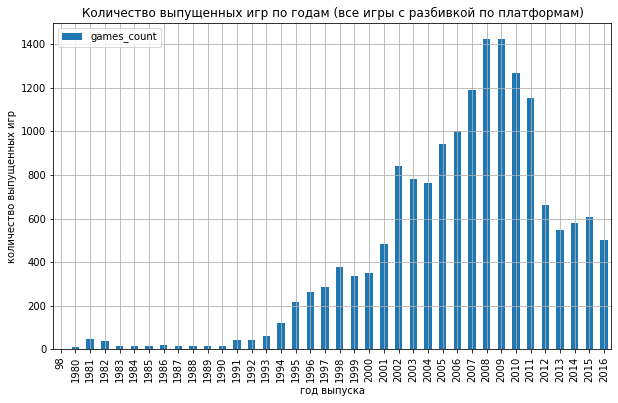

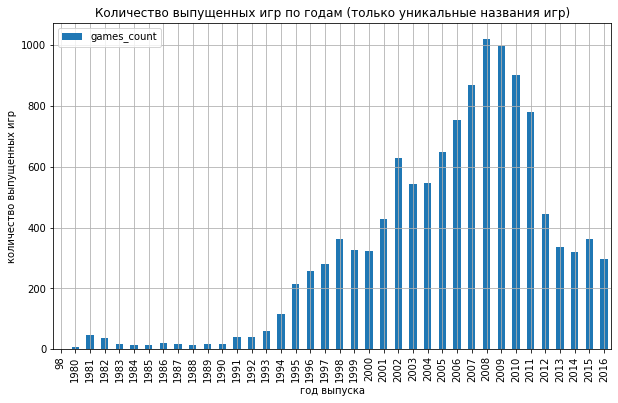

Продажи по годам в разрезе по платформам: 


total_sales
year_of_release platform             
2016            XOne            23.91
                X360             1.40
                WiiU             4.25
                Wii              0.17
                PSV              4.10
                PS4             59.01
                PS3              3.23
                PC               4.89
                3DS             14.50
2015            XOne            54.67
                X360            10.86
                WiiU            15.22
                Wii              1.05
                PSV              5.93
                PSP              0.12
                PS4            100.44
                PS3             14.70
                PC               7.93
                3DS             26.75
2014            XOne            49.26
                X360            31.61
                WiiU            20.35
                Wii              3.45
                PSV             10.56
                PSP              0.24
                PS4             84.22
                PS3             40.88
                PC              12.38
                3DS             41.75
2013            XOne            17.21
                X360            80.82
                WiiU            20.12
                Wii              7.87
                PSV              9.14
                PSP              3.34
                PS4             22.12
                PS3             95.85
                PC              11.83
                DS               1.42
                3DS             53.97

In [34]:
def print_bars(array, add_to_name): #функция расчета количества игр по годам и вывода графиков
    grouped_array = array.query('year_of_release > 0').groupby('year_of_release').agg({'name':'count'}) #подсчет количества игр по годам
    grouped_array.columns = ['games_count'] #переименуем колонки
    grouped_array.plot(kind = 'bar', grid = True, figsize = (10,6)) #нарисуем столбчатую диаграмму
    plt.title('Количество выпущенных игр по годам ('+ add_to_name+')')
    plt.xlabel('год выпуска')
    plt.ylabel('количество выпущенных игр')
    plt.show()
    return grouped_array


#посчитаем количество выпущенных игр по годам
games_years_count = print_bars(games, 'все игры с разбивкой по платформам')

#посчитаем количество уникальных выпущенных наименований игр по годам:
games_unique_years_count = print_bars(games[['name','year_of_release']] .drop_duplicates(), 'только уникальные названия игр')

print('Продажи по годам в разрезе по платформам: ')
games_years_platform_pivoted = games.query('year_of_release > 0').pivot_table(index=['year_of_release','platform'],values='total_sales',aggfunc = 'sum')
games_years_platform_pivoted.sort_index(ascending = False).head(40)

<b>Вывод</b><br>
На диаграммах явно видно, что, начиная с середины 90 - х годов начало резко возрастать количество выущенных игр, достигнув максимума в 2008 году, после чего заметна общая тенденция на снижение количества выпускаемых игр, причем в 2012 году снижение было очень резким. Единственное, о чем можно помнить, что данные за 2016 год могут быть неполными - то есть здесь мы пока можем говорить только о примерном количестве игр <br>
Что примечательно, графики "Количество выпущенных игр по годам (все игры с разбивкой по платформам)" и "Количество выпущенных игр по годам (только уникальные названия игр)" очень похожи, отличается, по сути, только количество. Отсюда можно сделать вывод, что практически все игры, выпускаемые в течение одного года, выпускались примерно на одних и тех же платформах, примерно на одном и том же количестве платформ. <br>
Очевидно, что не имеет смысла оценивать результаты старых периодов: как минимум, до начала 2000-ых - точно, потому что именно там, в 2002 году наблюдается резкий рост количества выпускаемых игр. А если учесть тот факт, что после 2008 года игр стали выпускать гораздо меньше, то, возможно, стоит учитывать больше этот период. <br>
Для определения актуального период необходимо вычислить тот период, в котором игры выпускались на актуальных для прогнозируемого периода платформах. Для этого необходимо видеть, на каких платформах осуществлялся выпуск игр, какие были наиболее популярны, какие находятся в начале своего жизненного цикла, а какие - в конце. По данным 2016, 2015, 2014, а также 2013 можно выявить несколько основных платформ, на которые стоит обратить внимание при формировании актуального периода: XOne, X360, WiiU, Wii, PSV, PSP, PS3, PS4, PC, 3DS, DS


Суммарные продажи по плтформам: 


,sum_sales
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.86
PS,689.95
GBA,310.12
PS4,265.79
PSP,252.63


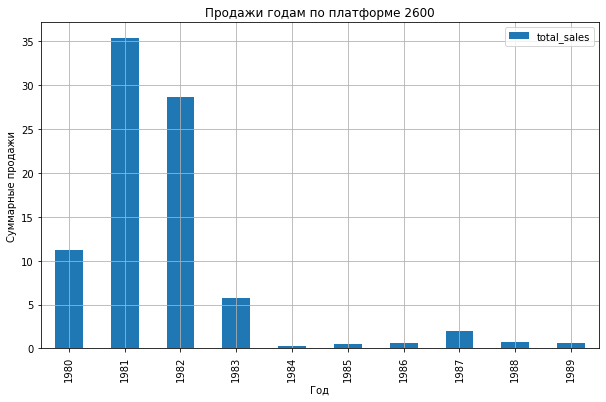

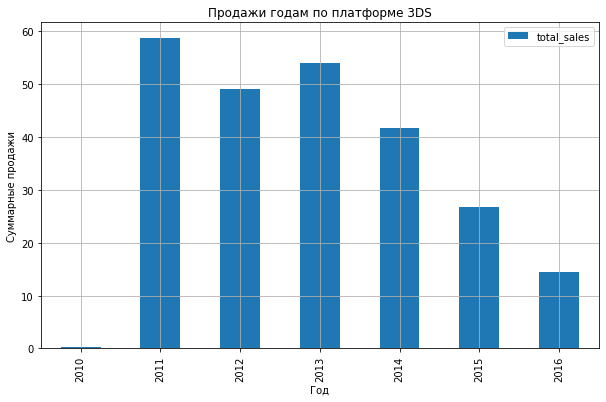

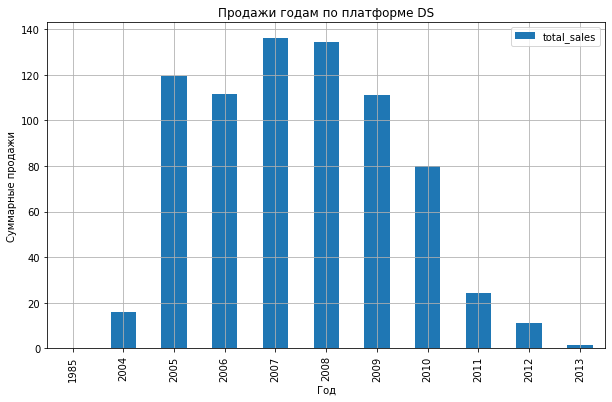

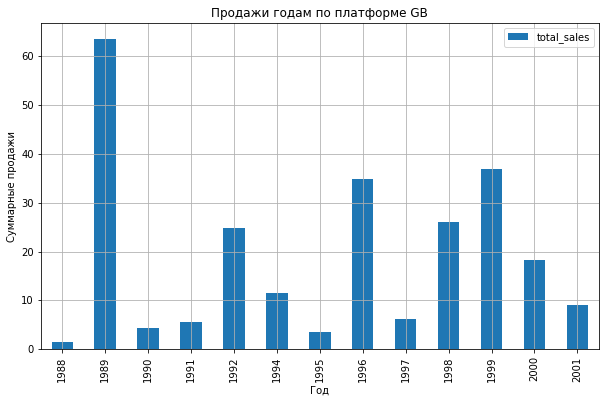

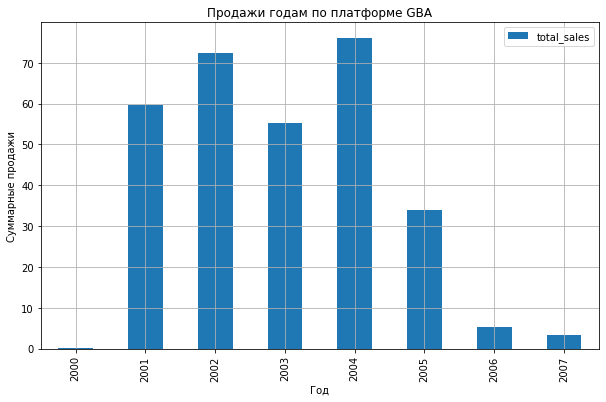

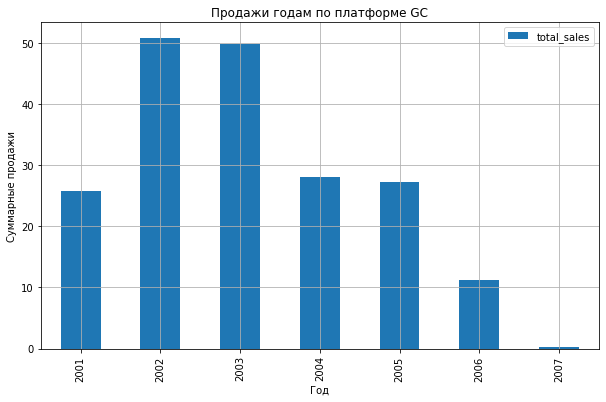

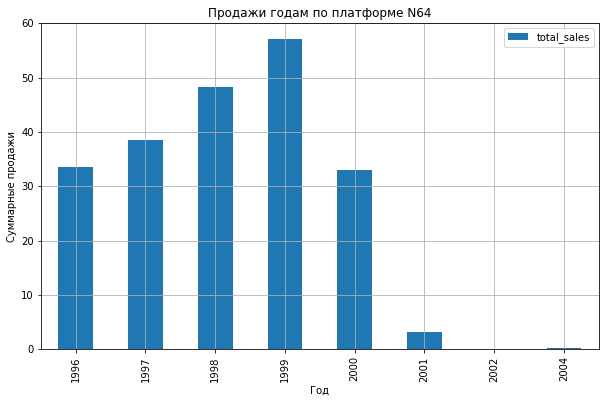

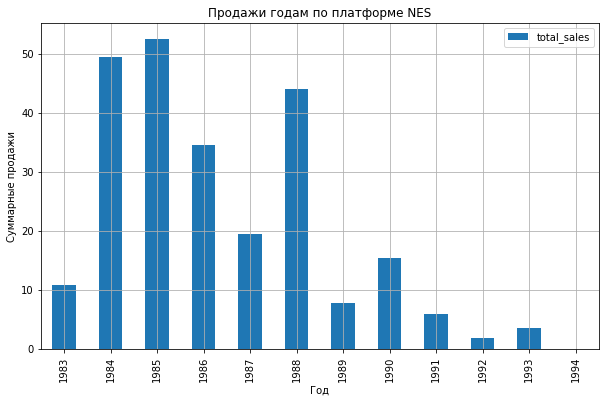

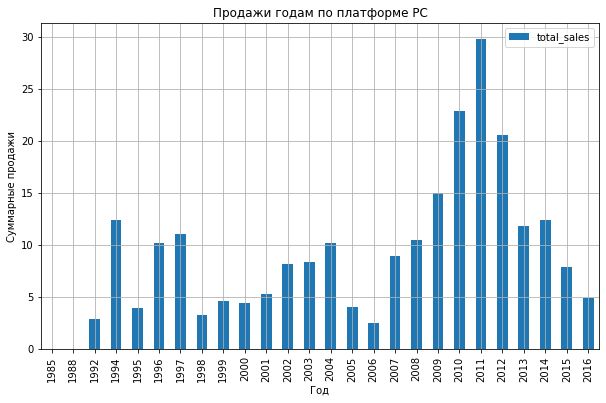

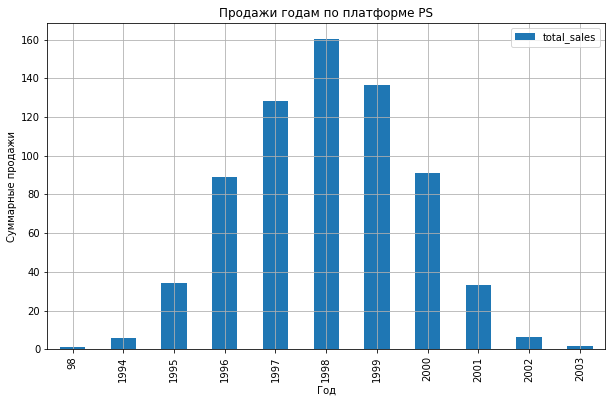

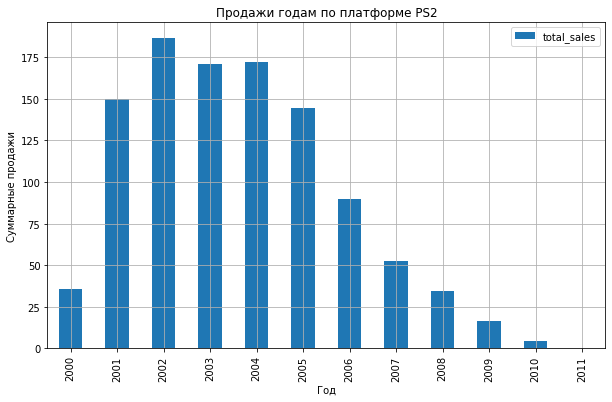

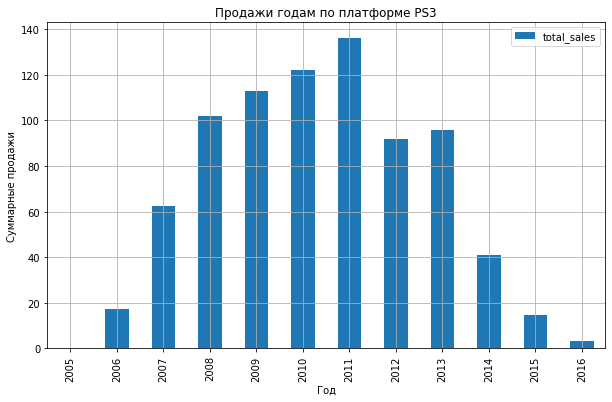

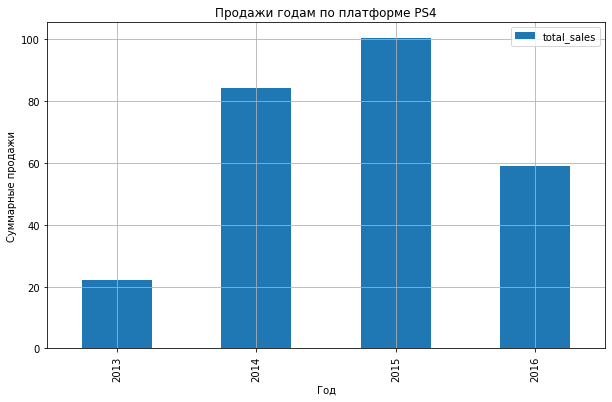

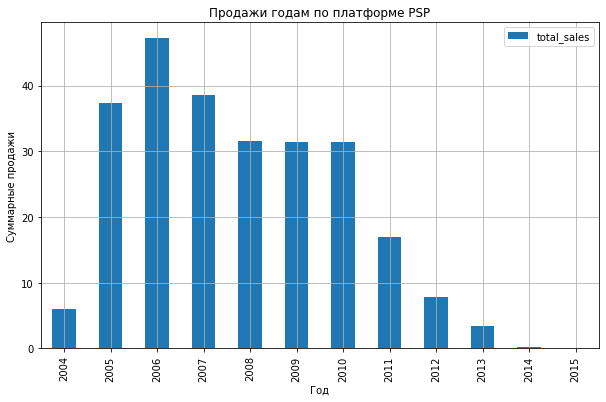

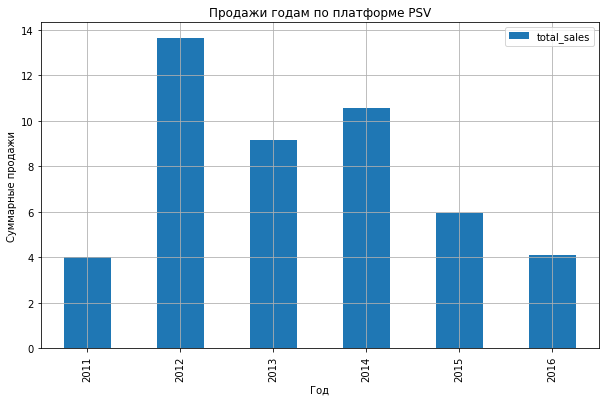

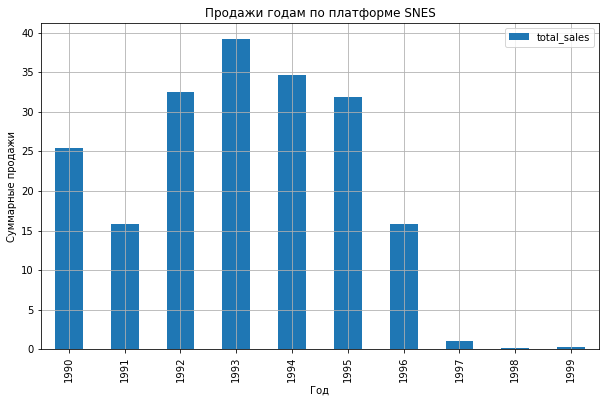

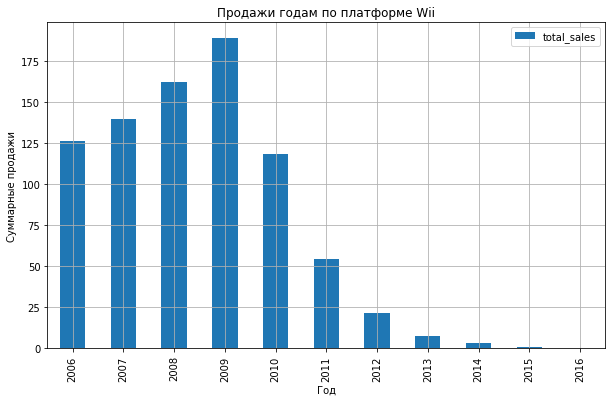

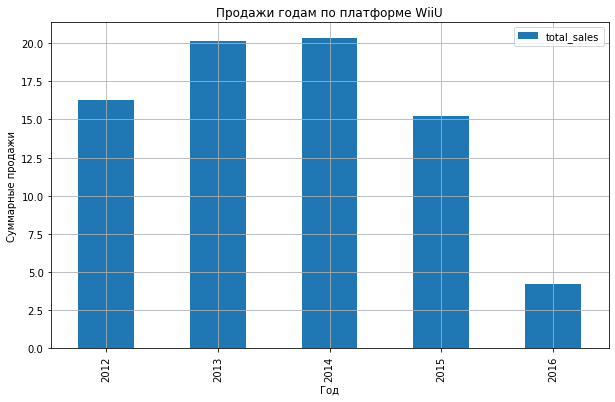

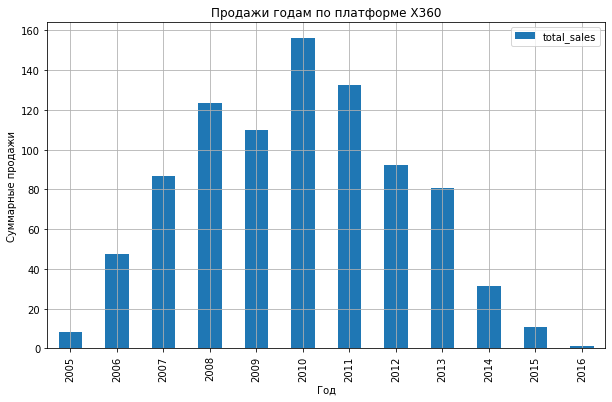

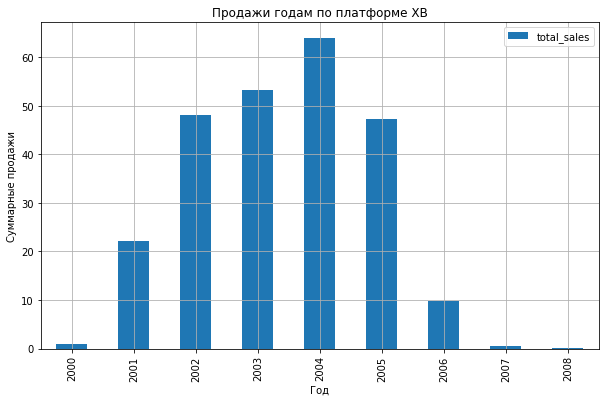

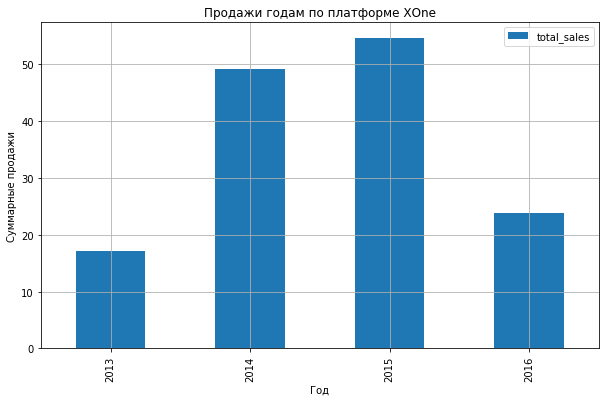

In [35]:
#посчитаем суммарные продажи по платформам и выведем на экран:
games_paltform_pivoted = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
games_paltform_pivoted.columns = ['sum_sales']
print('Суммарные продажи по плтформам: ')
display(games_paltform_pivoted.sort_values(by = 'sum_sales',ascending = False))
#Построим столбчатые диаграммы продаж по годам для всех платформ, у которых суммарные продажи составили боле 45 млн:
filter_games = games_paltform_pivoted.query('sum_sales > 45') #делаем срез
filter_games.reset_index(inplace = True) #сортируем
#filter_games
for i in range(0,len(filter_games)): #строим столбчатые диаграммы для каждой платформы, попавшей в сортировку
    ind =  filter_games.loc[i,'platform']
    #print(ind)
    game_year_platform_pivoted = games.query('platform == @ind and year_of_release > 0').pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum')
    game_year_platform_pivoted.plot(kind = 'bar', grid = True, figsize = (10,6))
    plt.title('Продажи годам по платформе {}'.format(ind))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.show()    


<b>Вывод</b><br>
Большинство платформ (за ислючением PC - игры для ПК существовали почти всегда и будут существовать, это всегда особая платформа для разработки. ПК доступно почти всем, так что большинство игр так или иначе должны быть доступны на нем) имеют жизненный цикл около 10 лет: некоторые чуть больше, некоторые чуть меньше; из которых наиболее активно они используются около 5-6 лет (как правило, начиная со 2-3 года существования платформы) <br>
Соответственно, если говорить об актуальном периоде, на который можно опираться,  строя прогноз на 2017 год,  для последующего анализа, то необходимо выделить тот период, в котором будут существовать все актульные на 2017 год платформы. <br>
<li> Платформа XOne: существует с 2013 года, в 2017 году, в соответствии с выяленной тенденцией, должна быть еще очень актуальна и популярна</li><br>
<li> Платфора X360: популярность падает (существует с 2005 года), так как на смену приходит XOne. Если в 2017 году и будут выпускать игры для данной платформы, то уже довольно мало, </li><br>
<li> Платформа WiiU: существует с 2012 года. Была довольно популярна. В 2016 году объем продаж резко падает, но это может быть связано с тем, что за 2016 год есть не все данные</li><br>
<li> Платформа Wii:Существовала в 2006 - 2016 гг, наиболее популярна в 2006 - 2011, после на смену пришла WiiU. В 2016 году объем продаж для этой платформы очень мал, и будет снижаться, так что, если игры для этой платформы и будут выпускаться, то очень мало</li><br>
<li> Платформа PSV: Существует с 2011 года, но в 2017 году объем продаж по ней уже может снижаться, да и в целом она не самая популярная</li><br>
<li> Платформа PS4: Существует с 2013 года, в 2017 году должна быть еще очень популярна.</li><br>
<li> Платформа PS3:  Существует с 2006 года, в 2016 уже очень низкий объем продаж, максимальные продажи были в 2008 - 2013 гг. Если в 2017 году и будут выпускаться игры для данной платформы, то совсем немного: ей на смену пришла PS4</li><br>
<li> Платформа PC: Абсолютно уникальная платформа: игры для ПК выпускались давно и выпускаться будут еще долго. Зарегистрированый мксимум продаж - для игр 2011 года, с 2012 года наблюдатеся заметное снижение. В 2017 году выпуск игр ожидается.</li><br>
<li> Платформа 3DS: Платформа существует с 2011 года, ожидается, что в 2017 году будет еще достаточно популярна </li><br>
Стоит учесть, то если для некоторых платформ прекратят выпускать новые игры, на смену им всегда придут новые платформы. Самые популярные платормы в 2016г: XOne, PS4, 3DS: по сути, еще набирающие популярность<br>
<br>
Таким образом, можно заметить следующие закономернсти: с 2011 и 2012 наблюдается значительное снижение объемов продаж в целом, особенно резкое оно было в 2012 году, после чего изменения достаточно "плавные", также можно видеть, что все популярные в 2016 году платформы существовали в 2011 - 2012 годах: либо они сами, либо их предшественники. На мой взгляд, наиболее "плавная" точка перехода  - в 2012 году. То есть наиболее подходящим началом актуального периода можно считать 2012 год.

<h3>Определение потенциально прибыльных платформ</h3>

In [36]:
#определим потенциально прибыльные платформы. какие лидируют по продажам: растут или падают. Выделить несколько потенциально 
#посчитаем продажи по платформам за период с 2012 года
actual_year_border = 2011 #зададим переменную
game_platform_pivoted = games.query('year_of_release > @actual_year_border').pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')
game_platform_pivoted.columns = ['sum_total_sale']
print('Продажи по платформам в актуальном периоде')
display(game_platform_pivoted.sort_values(by = 'sum_total_sale',ascending = False))

Продажи по платформам в актуальном периоде


,sum_total_sale
platform,
PS4,265.79
PS3,246.30
X360,217.03
3DS,186.11
XOne,145.05
WiiU,76.24
PC,57.64
PSV,43.38
Wii,33.87


<b>Вывод</b><br>
Как можно видеть из таблицы и столбчатых диаграмм в предыдущем блоке, потенциально наиболее прибыльными могут быть платформы с высоким объемом продаж и не устаревающие. Такими являются:<br>
<li> PS4: высокий объем продаж, существует с 2013 года, в 2016-2017 года ожидается еще высокая популярность платформы</li>
<li> 3DS: существует с 2011 года, в 2016-2017 годах ожидаются еще достаточно высокие продажи, однако, с тенденцией к снижению.</li>
<li> XOne:Достаточно "молодая" платформа 2013 года, все еще набирает популярность, объем продаж уже достаточно высокий</li> 
<li> WiiU: Существует с 2012 года, в 2016 году заметно снижение объема продаж, но это может быть связано с тем, что по этому году есть не все данные. в 2017 году может быть еще достаточно прибыльной</li>
<li> PC: платформа, которая будет прибыльна еще долгие годы. Игры для ПК достаточно востребованы, общие проджи достаточно высоки</li>
<li> PSV: существует с 2011 года, в 2017 году возможна достаточно высокая доходность</li>   

Продажи для платформ PS3, X360, Wii, DS, PSP уже либо окончательно завершились, либо уже значительно падают в связи выпуском платформ нового поколения

<h3>Анализ диаграмм размаха по платформам</h3>

Общая диаграмма размаха для каждой платформы:


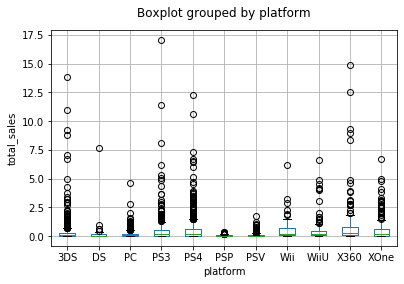

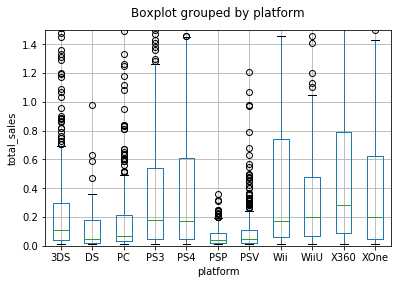

Описательная статистика по продажам на платформе  PS3
       total_sales
count   493.000000
mean      0.499594
std       1.201183
min       0.010000
25%       0.050000
50%       0.180000
75%       0.540000
max      17.090000
Диаграммы размаха для платформы  PS3


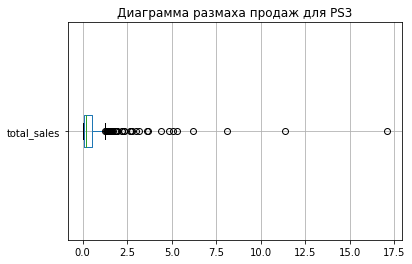

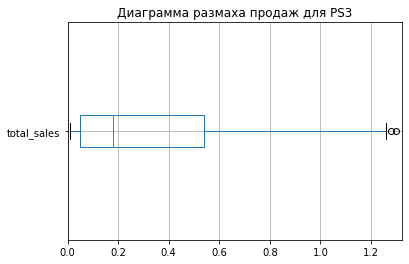

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  X360
       total_sales
count   294.000000
mean      0.738197
std       1.561085
min       0.010000
25%       0.090000
50%       0.280000
75%       0.790000
max      14.860000
Диаграммы размаха для платформы  X360


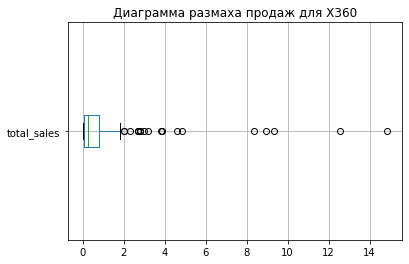

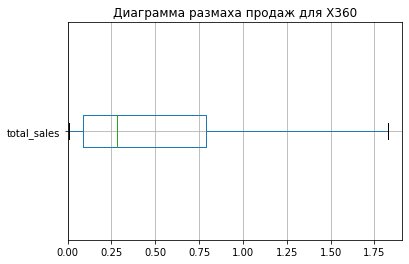

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  PS4
       total_sales
count   392.000000
mean      0.678036
std       1.355221
min       0.010000
25%       0.050000
50%       0.170000
75%       0.612500
max      12.250000
Диаграммы размаха для платформы  PS4


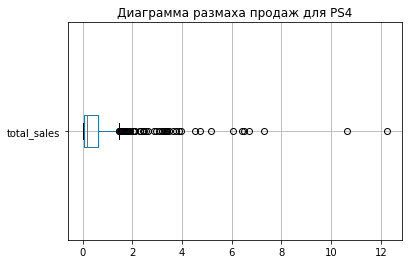

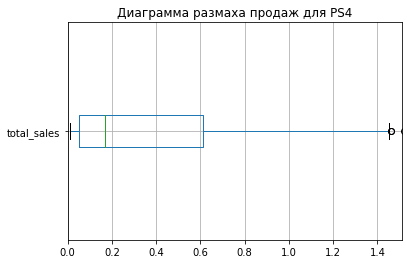

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  3DS
       total_sales
count   397.000000
mean      0.468791
std       1.310852
min       0.010000
25%       0.040000
50%       0.110000
75%       0.300000
max      13.820000
Диаграммы размаха для платформы  3DS


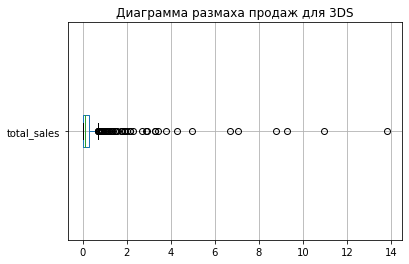

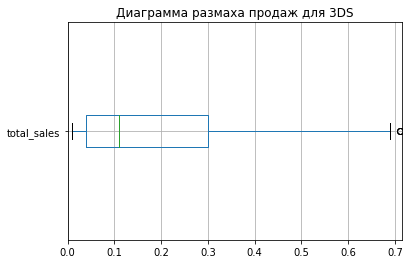

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  DS
       total_sales
count    32.000000
mean      0.388437
std       1.344374
min       0.010000
25%       0.020000
50%       0.045000
75%       0.182500
max       7.650000
Диаграммы размаха для платформы  DS


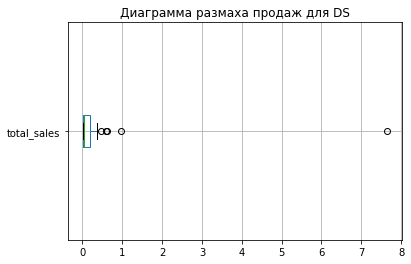

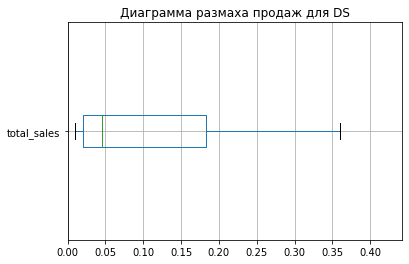

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  XOne
       total_sales
count   247.000000
mean      0.587247
std       0.942412
min       0.010000
25%       0.050000
50%       0.200000
75%       0.625000
max       6.710000
Диаграммы размаха для платформы  XOne


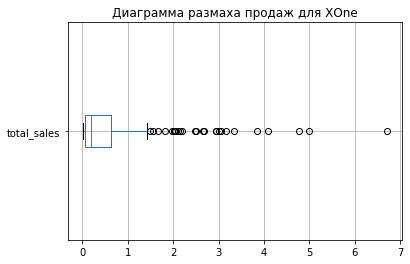

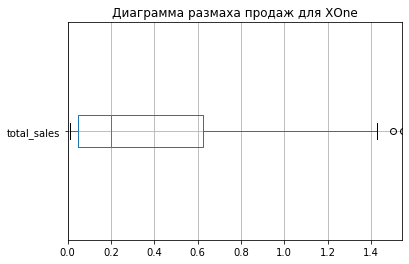

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  WiiU
       total_sales
count   147.000000
mean      0.518639
std       0.985139
min       0.010000
25%       0.070000
50%       0.200000
75%       0.480000
max       6.580000
Диаграммы размаха для платформы  WiiU


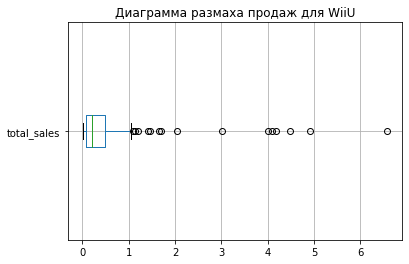

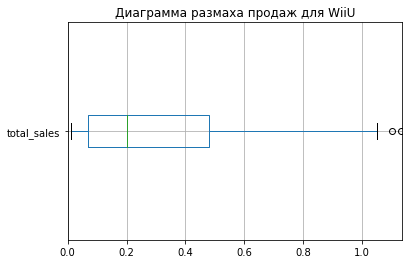

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  Wii
       total_sales
count    55.000000
mean      0.615818
std       1.062191
min       0.010000
25%       0.060000
50%       0.170000
75%       0.740000
max       6.210000
Диаграммы размаха для платформы  Wii


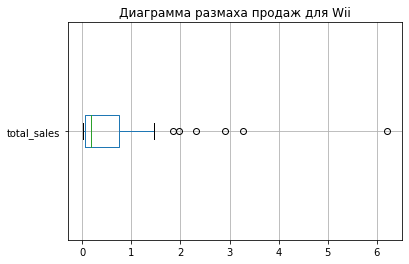

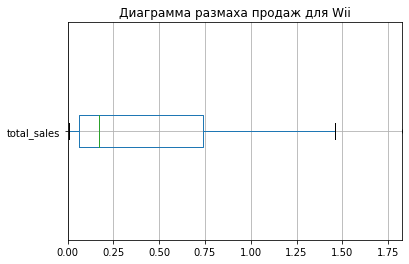

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  PC
       total_sales
count   255.000000
mean      0.226039
std       0.440031
min       0.010000
25%       0.030000
50%       0.070000
75%       0.215000
max       4.600000
Диаграммы размаха для платформы  PC


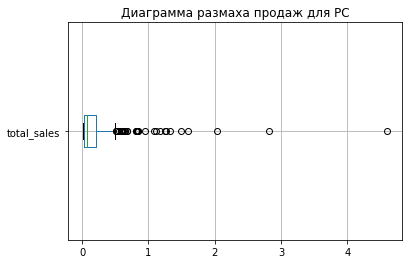

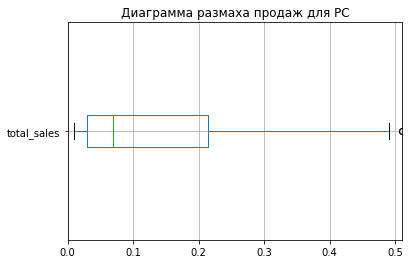

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  PSV
       total_sales
count   411.000000
mean      0.105547
std       0.169875
min       0.010000
25%       0.020000
50%       0.050000
75%       0.110000
max       1.720000
Диаграммы размаха для платформы  PSV


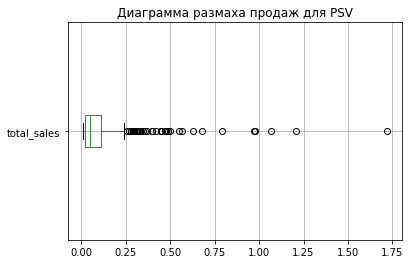

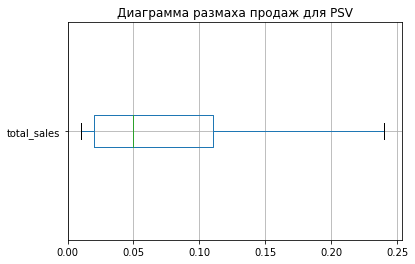

-----------------------------------------------------------------------------
Описательная статистика по продажам на платформе  PSP
       total_sales
count   175.000000
mean      0.065486
std       0.070341
min       0.010000
25%       0.020000
50%       0.040000
75%       0.090000
max       0.360000
Диаграммы размаха для платформы  PSP


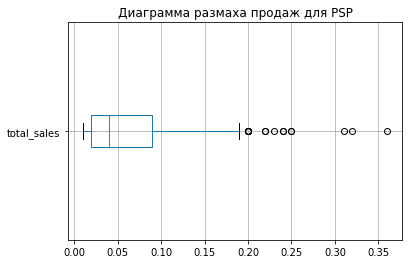

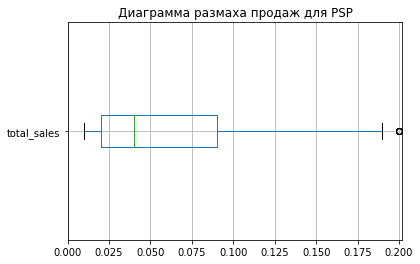

-----------------------------------------------------------------------------


In [37]:
warnings.filterwarnings("ignore")
def print_boxplot(array,platform_name,xlim_max): #Функция для прорисовки диаграммы размаха
    array.boxplot(vert = False) #нарисуем горизонтальную диаграмму
    plt.title('Диаграмма размаха продаж для '+platform_name) 
    if xlim_max > 0: #если указано максимальное значение, то установить границы отображения по оси Х 
        plt.xlim(0,xlim_max)
    plt.show()

total_sales_actual = games.query('year_of_release > @actual_year_border')[['platform','total_sales']] #создадим датафрейм для построения диаграмм
print('Общая диаграмма размаха для каждой платформы:')
#Построим общую диаграмму для всех платформ (полную и "обрезанную" по оси Y для наглядности:): 
total_sales_actual.boxplot(column = 'total_sales', by = 'platform')
plt.title('')
plt.ylabel('total_sales')
plt.show()
total_sales_actual.boxplot(column = 'total_sales', by = 'platform')
plt.title('')
plt.ylabel('total_sales')
plt.ylim(0,1.5)
plt.show()

unique_platform = total_sales_actual['platform'].unique() #определим уникальные наименования платформ
for platform in unique_platform: #для каждой платформы выведем отдельно значения описательных статистик и диаграммы размаха
    platform_total_sales = total_sales_actual.query('platform == @platform')
    y_lim_max = np.percentile(platform_total_sales.total_sales,75) + 1.6 * (np.percentile(platform_total_sales.total_sales,75) - np.percentile(platform_total_sales.total_sales,25))
    print('Описательная статистика по продажам на платформе ',platform)
    print(platform_total_sales.describe())
    print('Диаграммы размаха для платформы ',platform)
    print_boxplot(platform_total_sales,platform,0)
    print_boxplot(platform_total_sales,platform,y_lim_max)
    print('-----------------------------------------------------------------------------')



<b>Вывод</b><br>
На общей диаграмме размаха в разбивке по платформам хорошо видно, какие платформы действительно лидируют по объемам продаж: где медианное значение (50% всех продаж) и значения квартилей (25% и 75% соответственно): в этих платформах основная масса продаж выше, чем в остальных: <br>
<li> X360</li>
<li> Wii</li>
<li> XOne</li>
<li> PS4</li>
<li> PS3</li>
<li> WiiU</li>
Для этих же платформ самые большие значения выбросов: максимальные продажи. Однако очень высокие продажи есть еще и в платформе 3DS, хотя медианное значение почти в 2 раза ниже, чем у WiiU(0.11 против 0.2).<br>
Абсолютно все графики показывают смещение влево: более маленькие продажи встречаются чаще, чем более крупные, что в принципе, логично<br>
Примечательно, что платформа 3DS имеет более высокие суммарные продажи, чем платформа XOne. Но это достигается за счет очень больших "выбросов": максимальное значение для XOne - около 7 млн, для 3 DS же есть значения и в 7, 9, 11 и 14 млн. То есть есть очень популярные игры на этой платформе. <br>
Также очень большие значения выбросов наюлюдаются у платформ PS3(около 17.4 млн), X360 и PS4. Платформы PS3 и X360 были действительно очень популярны в анализируемый период, поэтому логично, что у них и медианные, и средние значения, и даже выбросы очень высокие. В следующие годы ожидается спад по этим платформам. Тогда как по PS4, XOne и 3DS будут набирать популярность<br>
У платформы Wii достаточно высоко расположено значение 3 квартиля: 0.66 млн. Однако, что примечательно, медианное значение ниже, чем у более "молодой WiiU": 0.17 против 0.2. То есть для WiiU меньше малопродваемых игр.
У платформ PS3 и PS4 медианное значение на одном уровне, у XOne чуть ниже, чем у X360.
Вообще, что характерно, у всех наиболее продаваемых игр медианное значение примерно на одном уровне. PS3, PS4, Wii - 0.17, WiiU, XOne - 0.2; значительно выделяется только X360 - 0.28, что также говорит об особой популярности данной платформы

<h3>Анализ зависимости между общими продажами и оценками пользователей и критиков</h3>

Коэффициенты корреляции и диагграммы рассеяния для платформы  X360
Корреляция между продажами и оценкой критиков:  0.35994216975276827
Корреляция между продажами и оценкой пользователей:  0.006694593701771726


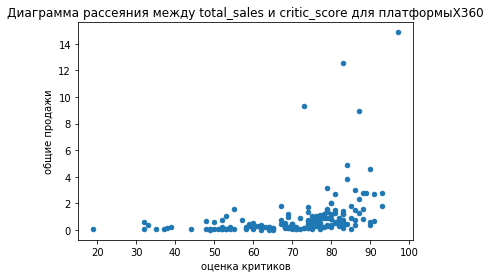

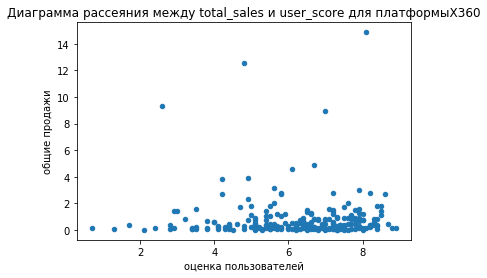


Проведем тот же самый анализ на очищенных от выбросов данных

Коэффициенты корреляции и диагграммы рассеяния для платформы  X360
Корреляция между продажами и оценкой критиков:  0.45697310036099276
Корреляция между продажами и оценкой пользователей:  0.14467651286232683


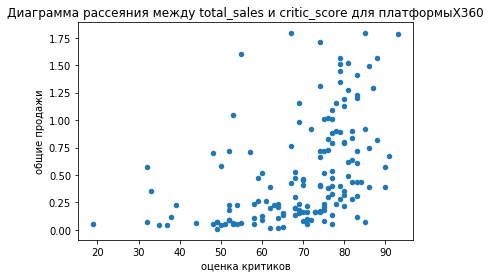

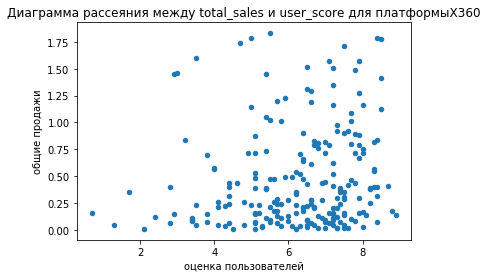

In [38]:

def print_scatter_and_corr_func(platform_name, total_sales_lim):   #функция для расчета коэффициента корреляции и вывода диаграмм рассеяния для заданной платформы
    #выведем
    if total_sales_lim > 0: #если указана максимальный объем продаж для расчета, то учитываем его в срезе
        games_sales_critics_analysis = games.query('platform == @platform_name and year_of_release > @actual_year_border and critic_score > 0 and total_sales < @total_sales_lim')[['total_sales','critic_score']]
        games_sales_users_analysis = games.query('platform == @platform_name and year_of_release > @actual_year_border and user_score > 0 and user_score < 100  and total_sales < @total_sales_lim')[['total_sales','user_score']]
    else: #если максимальный объем продаж не указан (в таком случае ставим 0), то строим срез без него
        games_sales_critics_analysis = games.query('platform == @platform_name and year_of_release > @actual_year_border and critic_score > 0')[['total_sales','critic_score']]
        games_sales_users_analysis = games.query('platform == @platform_name and year_of_release > @actual_year_border and user_score > 0 and user_score < 100')[['total_sales','user_score']]        
    #выводим коэффициенты корреляции и строим диаграммы рассеяния
    print('Коэффициенты корреляции и диагграммы рассеяния для платформы ', platform_name)
    print('Корреляция между продажами и оценкой критиков: ',games_sales_critics_analysis['total_sales'].corr(games_sales_critics_analysis['critic_score']))
    print('Корреляция между продажами и оценкой пользователей: ',games_sales_users_analysis['total_sales'].corr(games_sales_users_analysis['user_score']))
    games_sales_critics_analysis.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter')
    plt.xlabel('оценка критиков')
    plt.ylabel('общие продажи')
    plt.title('Диаграмма рассеяния между total_sales и critic_score для платформы' + platform_name)
    plt.show()
    games_sales_users_analysis.plot(x = 'user_score', y = 'total_sales', kind = 'scatter')
    plt.xlabel('оценка пользователей')
    plt.ylabel('общие продажи')
    plt.title('Диаграмма рассеяния между total_sales и user_score для платформы' + platform_name)
    plt.show()

#возьмем в качестве анализируемой платформы X360: по ней много продаж, и она была очень популярна в анализируемый период
print_scatter_and_corr_func('X360',0)
print()
#проведем тот же самый анализ на данных, очищенных от очень высоких объемов продаж, чтобы рассмотреть диаграммы рассеяния для обычных продаж более укрупненно
print('Проведем тот же самый анализ на очищенных от выбросов данных')
print()
print_scatter_and_corr_func('X360',2)


<b>Вывод:</b><br>
Коэффициент корреляции между продажами и оценкой критиков можно оценить как "слабая корреляция". На диаграмме рассеяния мы также можем видеть, что продажи действительно растут только при высокой оценке критиков, но при этой же оценке могут также быть и не очень высокие продажи. Очевидно, оценка критиков некоторым образом влияет на объем продаж, но это не единственный фактор.Также есть определеннные значения "выбросов": очень высоких продаж при не самой высокой оценке критиков. Если убрать из анализа эти "выбросы" (те значения продаж, которые не входят в границы статистически значимых интервалов - по данным диаграммы размаха), то корреляция становится более сильной, однако, все равно видно большое рассеяние. В столбце critic_score очень много пропусков, очевидно, что информация неполная. График отдаленно напоминает смещенную гиперболу, возможно, если бы было больше данных, можно было бы говорить о нелинейной зависимости между этими величинами. <br> Оценка критиков появляется уже после выхода игры. То есть к тому моменту, как будет получена оценка критиков, будет продано уже определенное количество игр (и здесь влияют многие факторы на объемы продаж, в том числе реклама)., и только после получения оценки критиков пользователи уже будут отталкиваться от нее при принятии решеия о покупке, поэтому у игр с наиболее выскокой оценкой заметен резкий рост объемов продаж. Эта схема будет в целом справедлива для всех платформ.

<br>
Коэффициент корреляции между продажами и оценкой пользователей слабый и отрицательный. И большое влияние на него оказали те же самые "выбросы": игры с очень большими продажами, но не самыми высокими оценками. Если их убрать из анализа, коэффициент корреляции остается также очень слабым. В целом он будет таким еще и потому, что пользователи формируют свою оценку уже после того, как купили игру. Конечно, высокие оценки будут мотивировать других людей покупать, и это тоже видно на графике: все-таки для игр с более-менее высокой оценкой больше продаж, однако новые пользователи могут опять же оценить игру более низким баллом, чем был ранее. Из-за чего говорить о какой-то прямой взаимосвязи между продажами и оценками пользовтелей невозможно.  
И это будет справедливо для всех продаж на всех платформах. <br>



<h3>Анализ продаж по жанрам</h3>

Статистики продаж по жанрам: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales
genre,,,,,,,
action,394.65,1041,0.379107,17.09,0.01,0.110,0.992388
shooter,267.49,237,1.128650,12.56,0.01,0.380,1.958210
role-playing,177.97,370,0.481000,13.82,0.01,0.135,1.224946
sports,158.63,267,0.594120,7.30,0.01,0.220,0.975668
misc,77.61,193,0.402124,8.37,0.01,0.120,0.972212
platform,55.42,85,0.652000,9.27,0.01,0.190,1.272299
racing,47.01,115,0.408783,6.58,0.01,0.120,0.797270
fighting,40.02,109,0.367156,7.07,0.01,0.130,0.837452
simulation,32.93,80,0.411625,8.78,0.01,0.110,1.187110


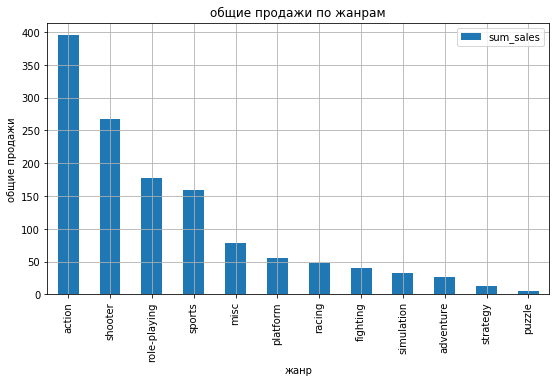

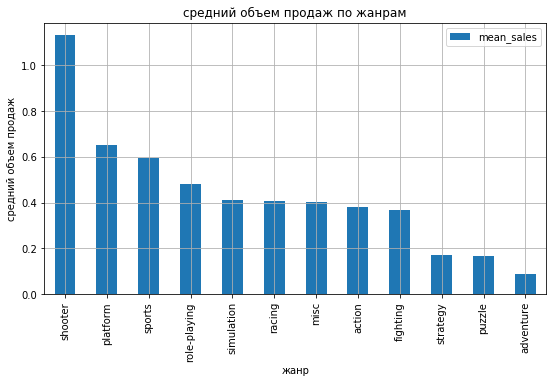

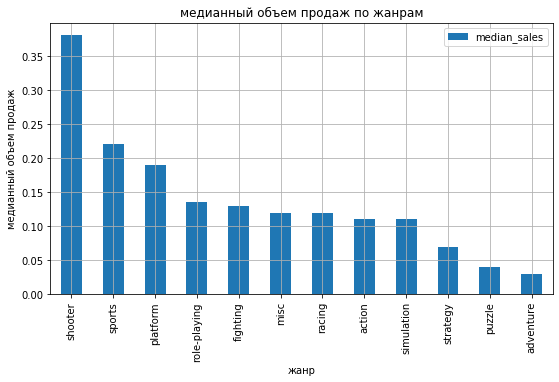

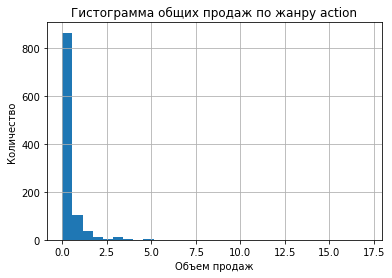

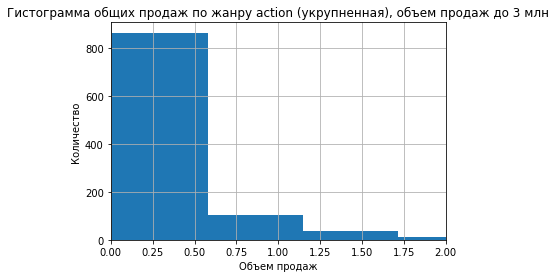

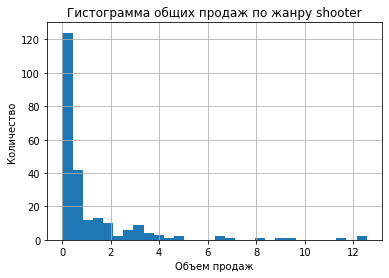

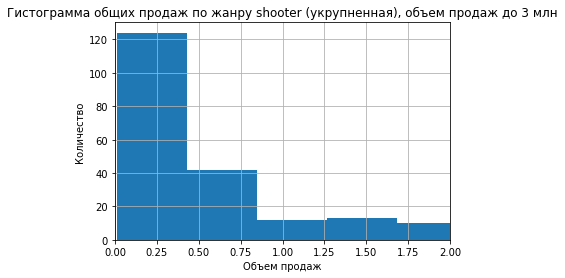

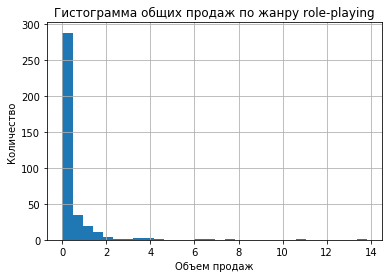

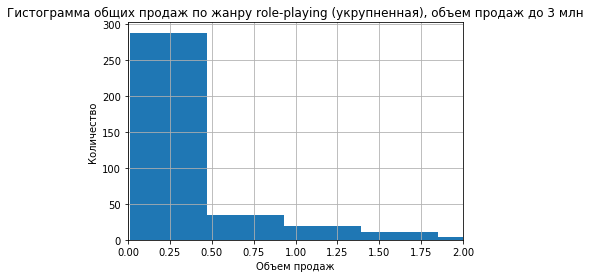

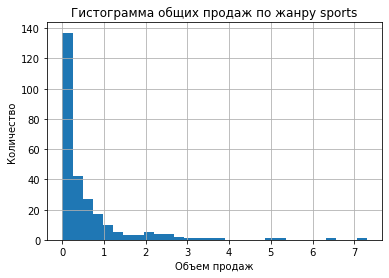

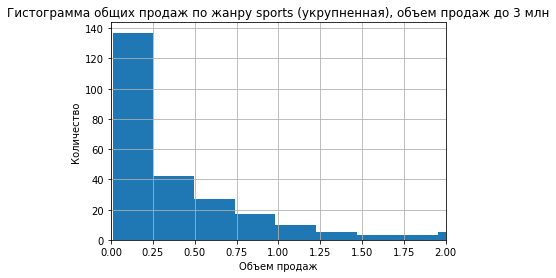

In [39]:
def print_bars(array, label): #функция для вывода столбчатой диаграммы
    array.plot(kind = 'bar', grid = True, figsize = (9,5)) #нарисуем столбчатую диаграмму
    plt.title( label + ' по жанрам')
    plt.xlabel('жанр')
    plt.ylabel(label)
    plt.show()

def make_pivot_and_print(index_col,values_col,title,head,is_part_sales):#функция для создания сводной таблицы на основе games и вывода ее 
    pivoted_array = games.query('year_of_release > @actual_year_border').pivot_table(index = index_col, values = values_col, aggfunc = ['sum','count','mean','max','min','median','std'])
    pivoted_array.columns = ['sum_sales','count_sales','mean_sales','max_sales','min_sales','median_sales','std_sales']
    if is_part_sales == True:
        pivoted_array['part_sales'] = pivoted_array['sum_sales'] / pivoted_array['sum_sales'].sum()
    print(title)
    if head > 0:
        display(pivoted_array.sort_values(by = 'sum_sales',ascending = False).head(5))
    else:    
        display(pivoted_array.sort_values(by = 'sum_sales',ascending = False))
    return pivoted_array
    
def print_hist(genre_name, platform_name,sales_col, bins_col, xlim, title):#функция печати гистограмм
    query_string = 'year_of_release > @actual_year_border '#формируем строку запроса:
    if genre_name != '':
        query_string = query_string + 'and genre == @genre_name '
    if platform_name!='':
        query_string = query_string + 'and platform == @platform_name '
    #print(query_string)    
    games.query(query_string)[sales_col].hist(bins = bins_col)#отрисовываем диаграмму и затем подписываем
    plt.title(title)
    plt.xlabel('Объем продаж')
    plt.ylabel('Количество')
    if xlim > 0:
        plt.xlim(0,2)
    plt.show()

games_genre_pivoted = make_pivot_and_print('genre','total_sales','Статистики продаж по жанрам: ',0, False) #создадим сводную таблицу и выведем ее
#построим столбчатые диаграммы и гистограммы:
print_bars(games_genre_pivoted.sort_values(by = 'sum_sales',ascending = False)[['sum_sales']],'общие продажи')
print_bars(games_genre_pivoted.sort_values(by = 'mean_sales',ascending = False)[['mean_sales']],'средний объем продаж')
print_bars(games_genre_pivoted.sort_values(by = 'median_sales',ascending = False)[['median_sales']],'медианный объем продаж')
print_hist('action','','total_sales',30,0,'Гистограмма общих продаж по жанру action')
print_hist('action','','total_sales',30,3,'Гистограмма общих продаж по жанру action (укрупненная), объем продаж до 3 млн')
print_hist('shooter','','total_sales',30,0,'Гистограмма общих продаж по жанру shooter')
print_hist('shooter','','total_sales',30,3,'Гистограмма общих продаж по жанру shooter (укрупненная), объем продаж до 3 млн')
print_hist('role-playing','','total_sales',30,0,'Гистограмма общих продаж по жанру role-playing')
print_hist('role-playing','','total_sales',30,3,'Гистограмма общих продаж по жанру role-playing (укрупненная), объем продаж до 3 млн')
print_hist('sports','','total_sales',30,0,'Гистограмма общих продаж по жанру sports')
print_hist('sports','','total_sales',30,3,'Гистограмма общих продаж по жанру sports (укрупненная), объем продаж до 3 млн')

<b>Вывод:</b><br>
Жанры с самыми высокими общми продажами - action, shooter, role-playing, sports, misc. Для них же характерно самое большое количество игр. То есть эти жанры можно назвать самыми популярными, тем более что у них также одни из самых высоких максимальных продаж. <br>
Рассмотрим их подробнее:<br>
В жанре action самые высокие общие продажи, самое большое количество игр и самое высокое значение максимальных продаж. Однако у него относительно низкие средние и медианные продажи, что говорит об очень большом количестве непопулярных игр (это также видно на гистограмме), хотя стандартное отклонение здесь также не самое большое, то есть не самый большой разброс относительно среднего<br>
В жанре shooter также очень высокие общие продажи, хотя по количеству выпущенных игр он на 4 месте, у него также очень высокие максимальные продажи (входят в 3 самых высоких). Но у shooter самое высокое значение средних и медианных продаж. Что говорит о том, чтов этом жанре помимо достаточно большого колиества непопулярных игр (это также видно на гистограмме), также еть немало популярных, хотя стандартное отклонение достточно высокое, что говорит о большом разбросе.<br>
В жанре sports довольно высокие средние и медианные значения продаж, не самый большой разброс, и не слишком большое максимальное значение. Это говорит о том, что в этом жанре  доля популярных игр выше по срвнению с предыдцщими жанрами (это также видно на гистограмме), хотя самих по себе игр достаточно много 
<br>
В жанре role-playing общие продажи также очень высоки,и очень много игр, максимальные продажи также очень высокие. Но при этом среднее значение  выше, чем в action, но медианное достаточно низкое. Это говорит о том, что в этом жанре также довольно много непопулярных игр, но продажи более популярных игр довольно высоки (особенно с учетом "выбросов").<br>
Можно заметить, что у некоторых игр с не самыми высокими общими продажами достаточно высокие медианные и средние значения:platform, rating, fighting, misc. В этих жанрах выпускается не очень много игр, но при этом там не так много совсем непопулярных игр. <br>
Такие жанры как adventiure, strategy, puzzle можно отнести к наименее прибыльным: игр мало, продажи по ним невысокие

<h2>Портрет пользователя каждого региона</h2>

<h3>Портрет пользовтеля в Северной Америке</h3>

Статистики продаж (ТОП - 5) в Северной Америке по platform: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
platform,,,,,,,,
X360,140.57,294,0.478129,9.66,0.0,0.17,1.052139,0.236929
PS4,108.74,392,0.277398,6.03,0.0,0.06,0.583723,0.183280
PS3,103.74,493,0.210426,7.02,0.0,0.05,0.527919,0.174853
XOne,93.12,247,0.377004,4.59,0.0,0.12,0.630618,0.156953
3DS,55.49,397,0.139773,5.28,0.0,0.00,0.490443,0.093528


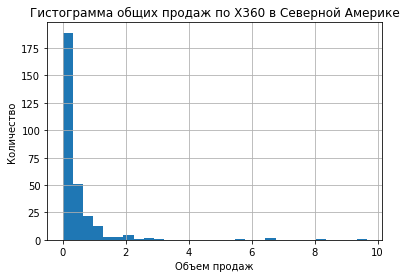

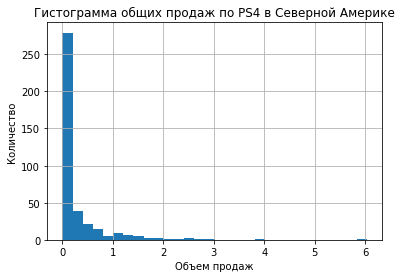

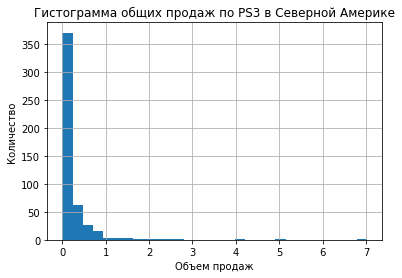

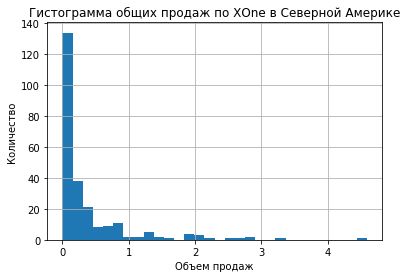

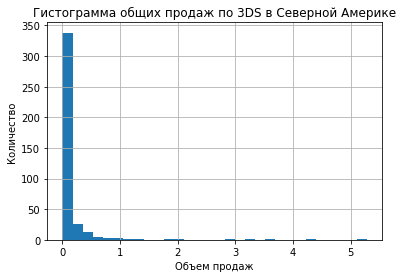

Статистики продаж (ТОП - 5) в Северной Америке по genre: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
genre,,,,,,,,
action,180.15,1041,0.173055,9.66,0.0,0.02,0.498878,0.303641
shooter,144.79,237,0.610928,8.25,0.0,0.20,1.145478,0.244042
sports,81.53,267,0.305356,2.60,0.0,0.08,0.510577,0.137418
role-playing,64.00,370,0.172973,5.28,0.0,0.02,0.503178,0.107871
misc,38.19,193,0.197876,5.70,0.0,0.01,0.596993,0.064369


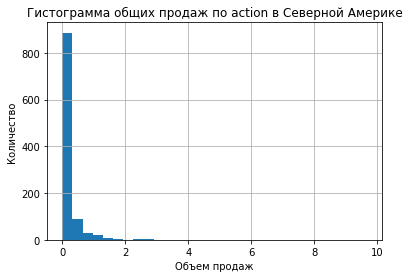

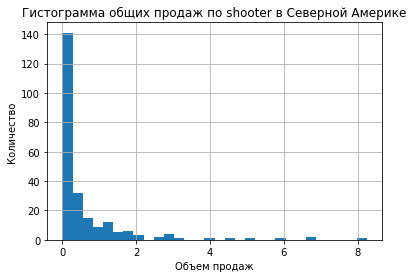

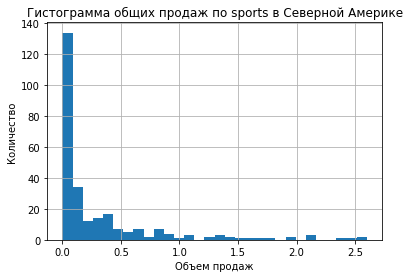

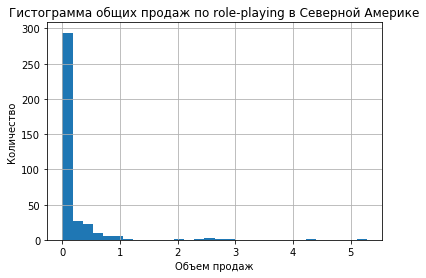

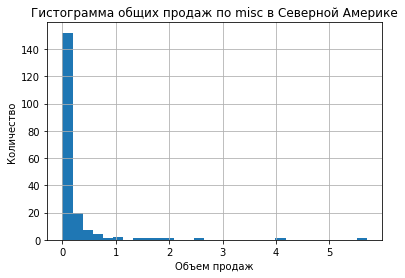

Оценка влияния рейтинга ESRB на продажи в  Северной Америке


,sum_sales,count_sales,max_sales,median_sales,mean_sales,part_sum_sales
rating,,,,,,
E,114.37,394,3.66,0.07,0.290279,0.192769
E10+,77.93,313,4.05,0.13,0.248978,0.131350
M,231.67,503,9.66,0.15,0.460577,0.390477
T,66.02,412,2.78,0.05,0.160243,0.111276
Unknown,103.31,1276,6.03,0.00,0.080964,0.174128


In [40]:
def func_print_popular(column,reg_name,popularity):#Функция печати сводной таблицы и гистограмм 
    arr_pivoted = make_pivot_and_print(popularity,column,'Статистики продаж (ТОП - 5) в '+reg_name+' по '+popularity+': ',5,True) #создадим сводную таблицу и выведем ее
    NA_popular = arr_pivoted.sort_values(by='sum_sales',ascending = False).reset_index().head(5)[popularity]
    #Выведем гистограммы для этих платформ
    for platform in NA_popular:
        if popularity == 'platform':
            print_hist('',platform,column,30,0,'Гистограмма общих продаж по '+platform+' в '+reg_name)
        elif popularity == 'genre':
            print_hist(platform,'',column,30,0,'Гистограмма общих продаж по '+platform+' в '+reg_name)
    return arr_pivoted
def typical_portrait(column, title): #функция печати всей необходимой информации о типичном пользователе региона
    func_print_popular(column,title,'platform') #определим самые популярные платформы
    func_print_popular(column,title,'genre') #определим самые популярные жанры
    #определим влияние рейтинга ESRB 
    pivoted_array = games.query('year_of_release > @actual_year_border').pivot_table(index = 'rating', values = column, aggfunc = ['sum','count','max','median','mean'])
    pivoted_array.columns=['sum_sales','count_sales','max_sales','median_sales','mean_sales']
    pivoted_array['part_sum_sales'] = pivoted_array['sum_sales'] / pivoted_array['sum_sales'].sum()
    print('Оценка влияния рейтинга ESRB на продажи в ',title)
    display(pivoted_array)

    
#Опишем типичный портрет пользователя в Северной Америке  
typical_portrait('na_sales', 'Северной Америке')


<b>Вывод:</b><br>
В Северной Америке наиболее популярны (ТОП - 5) следующе платформы: X360,PS4,PS3,XOne,3DS. Самая популярная  - X360. На ее долю приходится 23,7% продаж. Однако эта платформа уже завершает свой жизенный цикл, и ей на смену приходит XOne: она также входит в топ-5 (на 4 месте), однако, ввиду того что она только набирает свою популярность (существует с 2013 года), ожидается ткже рост продаж по ней. Наравне с XOne с 2013 года существует платформа PS4, продажи по ней несколько выше, и она уже опережает свою предшественницу - PS3. Возможно, что среди платформ нового поколения PS4 может быть популярнее, чем XOne (об этом говорит и тот факт, что тираж наиболее продваемой игры для PS4 выше, чем для XOne (6.03 против 4.59), хотя медианные продажи для XOne выше: это говорит о том, что доля совсем непопулярных игр на XOne гораздо ниже). Платформа 3DS не так популярна, как все остальные. Ее доля продаж - 9,3%, средние и медианные продажи близки к нулю - очень много совсем непопулярных игр. По ней и глобальные продажи были сравнительно маленькими (она входит в список наиболее популярных платформ, но в конце его). Эта платформа сеществует с 2011 года, так что ее популярность должна падать.<br>
На гистограммах, а также в столбцах среднего и медианного значения хорошо видно, что у всех абсолютно платформ высока доля очень непопулярных игр. <br>
Самые популярные жанры в Северной Америке - action,shooter, sports, role-playing, misc. <br>
Доля продаж action - свыше 30%, однако, если посмотреть на гистограмму, среднее и медианное значение, становится очевидно, что в этом жанре очень много епопулярных игр. В этом жанре в принципе больше всего игр, и просто огромное количество (около 900) низкой популярности. Самые большие суммарные продажи получаются за счет общего большого количества игр и наличия очень популярных (в этом же жанре смая популярная игра, проданная 9.66 млн раз)<br>
В shooter медианное значение уже в 10 раз выше, а самая популярная игра тиражом 8.25 млн. То есть в этом жанре намного меньшую долю занимают непопулярные игры (около 140, при том что всего игр 236). То есть в данном жанре игр меньше, но среди них и меньше непопулярных. Здесь также самые высокие средние продажи<br>
В жанре sports нет настолько популянрных игр, как в других жанрах, однако доля совсем непопулярных игр не так высока (около 135 из 268), а также самих игр достаточно много, что позволило этому жанру оказаться третьим в списке<br>
В жанре role-playing значительно больше игр, чем в sports и shooter, при этом суммарные продажи относительно невысоки, хотя максимальное значение более чем в 2 раза выше, чем для sports: в этом жанре высока доля непопулярных игр (почти 290 из 368), но при этом есть и достаточно популярные<br>
В misc очень мало игр и почти 150 из 192 - непопулярные, за счет чего очень низкое медианное значение. Но есть несколько достаточно популярных игр, которые и сделали этот жанр одним из самых прибыльных. <br>
<br>
Согласно анализу продаж по рейтингу ESRB, наиболее популярны в Северной Америке игры для взрослых (старше 17 лет), у этих игр самые высокие суммарные продажи, количество продаж, даже мксимальные, средние и медианные продажи. Игры данной категории явно лидируют на рынке<br>
игры для всей семьи - 19,3% от общего объема, здесь досаточно высокие средние и очень низкие медианные продажи: очень много непопулярных игр, но есть игры с высокой популярностью<br>
игры для детей от 10 лет -12.8% продаж, здесь намного меньше непопулярных игр<br>
игры для подростков т 13 лет еще менее популярны 11,1%, и там очень много игр с низкими продажами, то есть для Северной Америки игры данной категории - не самые прибыльные<br>


<h3>Портрет пользователя в Европе</h3>

Статистики продаж (ТОП - 5) в Европе по platform: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
platform,,,,,,,,
PS4,141.09,392,0.359923,6.31,0.0,0.08,0.810843,0.277093
PS3,107.27,493,0.217586,9.09,0.0,0.03,0.666716,0.210672
X360,74.89,294,0.254728,5.14,0.0,0.10,0.562787,0.147080
XOne,51.59,247,0.208866,2.19,0.0,0.07,0.365306,0.101320
3DS,42.83,397,0.107884,4.19,0.0,0.00,0.388756,0.084116


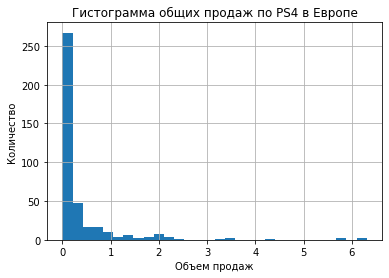

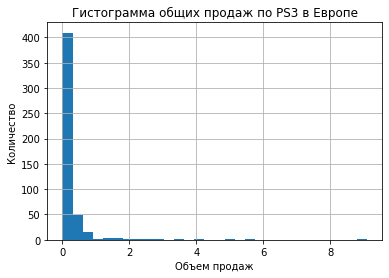

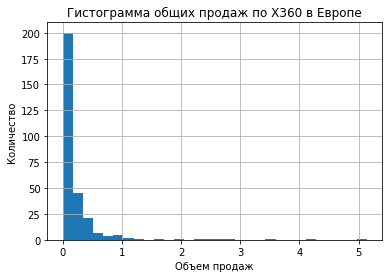

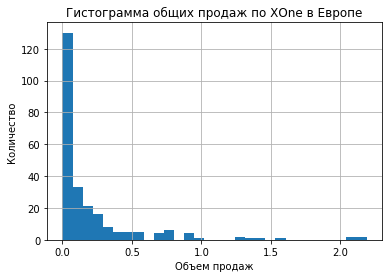

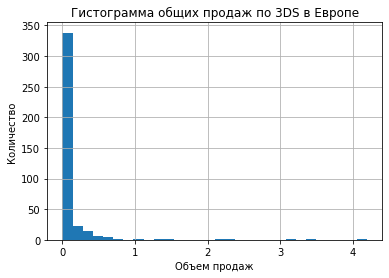

Статистики продаж (ТОП - 5) в Европе по genre: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
genre,,,,,,,,
action,161.70,1041,0.155331,9.09,0.0,0.02,0.495986,0.317569
shooter,113.47,237,0.478776,5.86,0.0,0.17,0.830466,0.222849
sports,69.09,267,0.258764,6.12,0.0,0.05,0.724894,0.135689
role-playing,48.53,370,0.131162,4.19,0.0,0.01,0.407615,0.095310
racing,27.29,115,0.237304,2.15,0.0,0.09,0.384460,0.053596


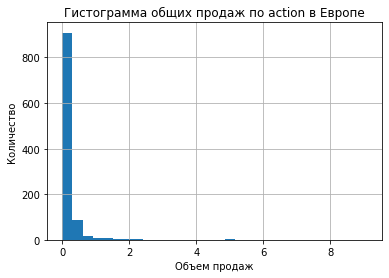

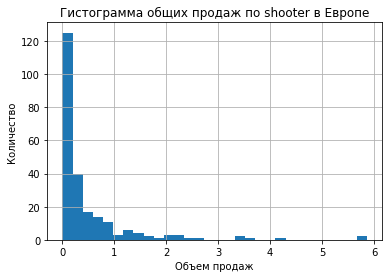

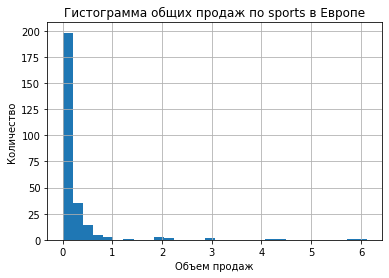

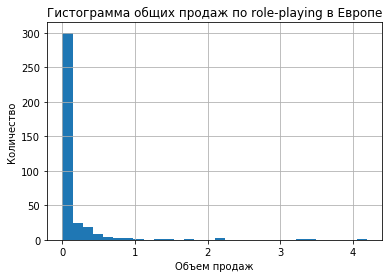

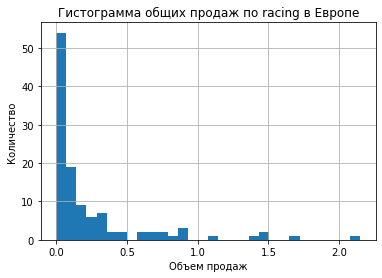

Оценка влияния рейтинга ESRB на продажи в  Европе


,sum_sales,count_sales,max_sales,median_sales,mean_sales,part_sum_sales
rating,,,,,,
E,113.03,394,6.12,0.06,0.286878,0.221984
E10+,57.25,313,2.16,0.11,0.182907,0.112436
M,194.44,503,9.09,0.13,0.386561,0.381869
T,52.96,412,2.50,0.04,0.128544,0.104010
Unknown,91.50,1276,5.86,0.00,0.071708,0.179701


In [41]:
#Опишем типичный портрет пользователя в Европе
typical_portrait('eu_sales', 'Европе')

<b>Вывод</b><br>
В Европе максимальной популярностью пользуются платформы PS4 и PS3, причем PS4 более популярна, чем PS3. У обеих платформ очень высокая доля непопулярных игр (это видно на гистограммах и по медианному значению), однко на PS4 больше игр более высокой популярности. Платформы X360 и XOne значительно менее популярны (почти в 2 раза), однако доля игр с низкими продажами на этих платформах гораздо ниже, что обеспечивает им более высокое медианное значение, даже среднее значение у X360 выше, чем у PS3, а у XOne ненамного меньше. Это все говорит о том, что на PS3 и PS4 продают намного большее количество игр, но на X360 и XOne сами игры, по большей части, прибыльнее. Платформа 3DS здесь также не особо популярна: медианное значение 0, однако  есть некоторое количество игр достаточно высокой популярности. <br>
Самые популярные жанры в Европе - action,shooter, sports, role-playing, racing. И общая картина по 2 первым, в целом, очень попхожа на ситуацию в Северной Америке, однако очевидно, в Европе больше любят игры жанра sports<br>
Доля продаж action - свыше 31,5,%, однако, если посмотреть на гистограмму, среднее и медианное значение, становится очевидно, что в этом жанре очень много непопулярных игр. В этом жанре в принципе больше всего игр, и просто огромное количество (около 900) низкой популярности. Самые большие суммарные продажи получаются за счет общего большого количества игр и наличия очень популярных (в этом же жанре смая популярная игра, проданная 9.09 млн раз)<br>
В shooter медианное значение уже в 8,5 раз выше, а самая популярная игра тиражом 5.86 млн. То есть в этом жанре намного меньшую долю занимают непопулярные игры (около 125, при том что всего игр 236). То есть в данном жанре игр меньше, но среди них и меньше непопулярных. Здесь также самые высокие средние продажи<br>
В жанре sports есть некоторое количество очень популярных игр, однако доля совсем непопулярных игр достаточно высока (около 200 из 268), а также самих игр достаточно много, что позволило этому жанру оказаться третьим в списке<br>
В жанре role-playing значительно больше игр, чем в sports и shooter, при этом суммарные продажи относительно невысоки: в этом жанре высока доля непопулярных игр (почти 300 из 368), но при этом есть и достаточно популярные<br>
В racing очень мало игр, однако здесь невысока доля совсем непопулярныз игр, за счет чего медианное значение достаточно высоко (0.9).  <br>
<br>
Согласно анализу продаж по рейтингу ESRB, наиболее популярны в Европе игры для взрослых (старше 17 лет), у этих игр самые высокие суммарные продажи, количество продаж, даже мксимальные, средние и медианные продажи. Игры данной категории явно лидируют на рынке (38%)<br>
игры для всей семьи - 22,2% от общего объема, здесь досаточно высокие средние и относительно низкие медианные продажи: очень много непопулярных игр, но есть игры с высокой популярностью<br>
игры для детей от 10 лет -10.9% продаж, здесь намного меньше непопулярных игр<br>
игры для подростков т 13 лет еще менее популярны 10,4%, и там очень много игр с низкими продажами, то есть для Европы игры данной категории - не самые прибыльные
<br>
В целом картина по Европе похожа на картину по Северной Америке. Только здсь больше любят платформы PS4, PS3, чем X360, XOne, а также игры sports и racing более популярны

<h3>Портрет пользовтеля в Японии</h3>

Статистики продаж (ТОП - 5) в Японии по platform: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
platform,,,,,,,,
3DS,87.79,397,0.221134,4.39,0.0,0.06,0.557534,0.455295
PS3,35.29,493,0.071582,0.98,0.0,0.03,0.123389,0.183020
PSV,21.04,411,0.051192,0.90,0.0,0.03,0.074233,0.109117
PS4,15.96,392,0.040714,0.49,0.0,0.01,0.069101,0.082771
WiiU,13.01,147,0.088503,1.46,0.0,0.00,0.235129,0.067472


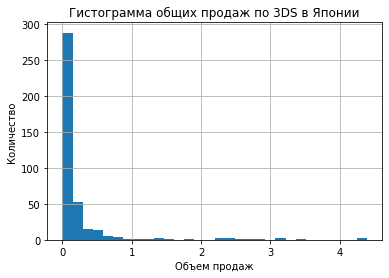

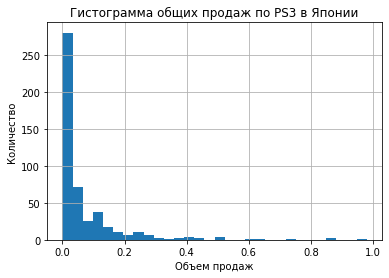

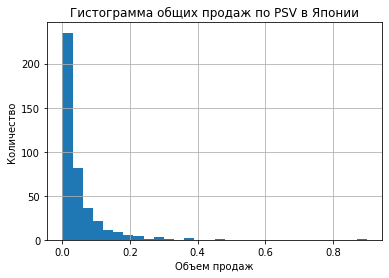

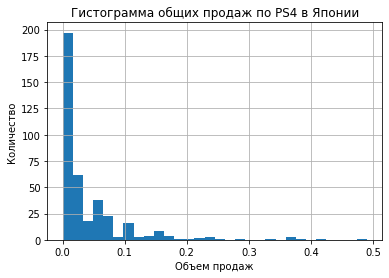

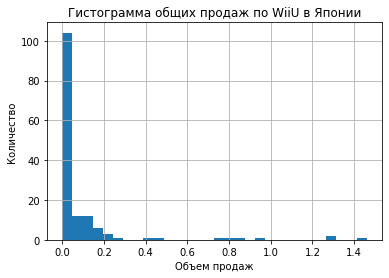

Статистики продаж (ТОП - 5) в Японии по genre: 


,sum_sales,count_sales,mean_sales,max_sales,min_sales,median_sales,std_sales,part_sales
genre,,,,,,,,
role-playing,65.44,370,0.176865,4.35,0.0,0.06,0.479818,0.339384
action,52.80,1041,0.050720,2.79,0.0,0.01,0.151275,0.273831
misc,13.10,193,0.067876,0.90,0.0,0.02,0.140609,0.067939
simulation,10.41,80,0.130125,4.39,0.0,0.00,0.552216,0.053988
fighting,9.44,109,0.086606,2.43,0.0,0.03,0.251916,0.048958


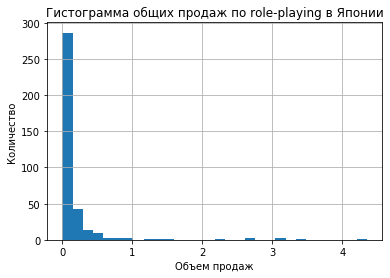

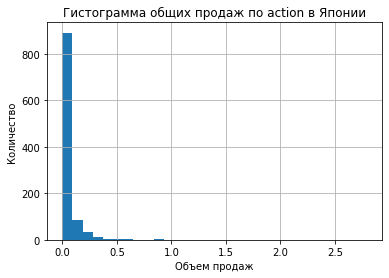

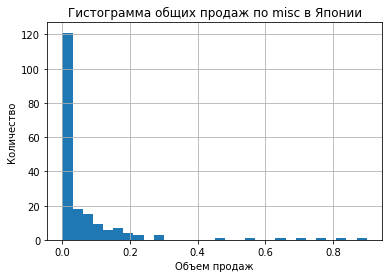

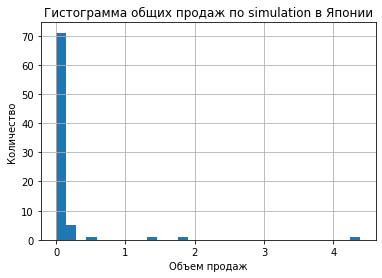

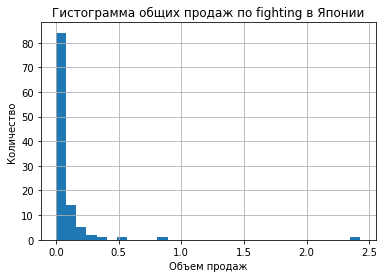

Оценка влияния рейтинга ESRB на продажи в  Японии


,sum_sales,count_sales,max_sales,median_sales,mean_sales,part_sum_sales
rating,,,,,,
E,28.33,394,4.39,0.00,0.071904,0.146925
E10+,8.19,313,1.46,0.00,0.026166,0.042475
M,21.20,503,0.98,0.00,0.042147,0.109947
T,26.02,412,2.62,0.01,0.063155,0.134945
Unknown,109.08,1276,4.35,0.03,0.085486,0.565709


In [42]:
#Опишем типичный портрет пользователя в Японии  
typical_portrait('jp_sales', 'Японии')

<b>Вывод:</b><br>
В Японии наиболее популярны платформы: 3DS, PS3, PSV, PS4,WiiU. Очевидно, японцы предпочитают именно японские платформы. 
3DS - абсолютный лидер в Японии. 45,6% продаж для этой платформы, а также довольно много очень популярных игр, что обеспечивает, несмотря на высокую долю совсем непопулярных игр, самое большое медианное значение. <br>
Платформы PlayStation (PS3, PSV, PS4) наиболее популярны по количеству наименований игр, продаваемых на данных патформах, но для них нет настолько популярных игр, как для 3DS: их максимальные значения гораздо ниже. Среди платформ PlayStation PS3 наиболее популярна, так как она более старая и для нее выпущено больше игр.<br>
Для платформы WiiU есть более популярные игры, чем для PlayStation, однако для данной платформы есть очень много совсем непопулярных игр (около 110 из 147), что обеспечивает ей нулевое медианное значение и относительно высокое среднее<br>
В Японии популярные жанры отличаются от Америки и Европы. Это: role-playing, action, misc, simulation, fighting.<br>
У role-playing почти 34% продаж., самое высокое среднее и медианное значение. Это обеспечивается тем, что здесь довольно много игр с высокой популярностью.<br>
У action 27,4% продаж, очень много наименований игр, но при этом очень низкое среднее и медианное значение. В этом жанре просто очень много игр, что и обеспечивает большую прибыльность<br>
В жанре misc игр уже значительно меньше, да и процент продаж только 6,7%. Здесь много достаточно непопулярных (120 из 192), и нет очень популярных игр. Но при этом, судя по гистограмме, довольно много игр просто невысокой и средней популярности
В играх simulation почти все игры непопулярные, однако есть некоторое количество очень продаваемых на территории Японии, благодаря чему 5,4% продаж именно у этого жанра<br>
В жанре fighting 4,9% продаж, что обеспечивается некоторыми достаточно популярными играми этого жанра. <br>
В Японии продажи в зависимости от рейтинга ESRB уже совершенно иные: наиболее популярны игры "для всех" и "для подростков от 13 лет", игры для взрослых только на 3 месте. Это говорит о том, что в Японии больше стоит ориентироваться на более молодую аудиторию.



<h2>Проверка статистических гипотез</h2>

<h3>Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"</h3>

Сформулируем <b>нулевую</b> гипотезу: Сердние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Тогда <b>альтернативная</b> гипотеза: Сердние пользовательские рейтинги платформ Xbox One и PC отличаются

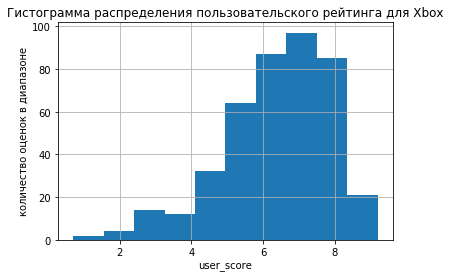

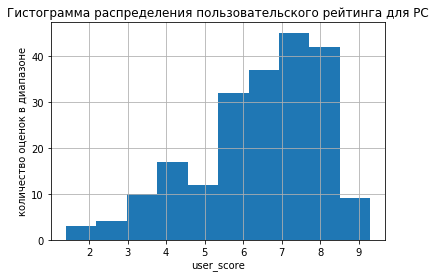

Дисперсия для Xbox:  user_score    2.254463
dtype: float64
Дисперсия для PC:  user_score    2.747158
dtype: float64
p-value =  [0.50871551]
Не удлось отвергнуть нулевую гипотезу


In [43]:
#получим наборы данных с пользовательским рейтингом для платформ:
#из анализа исключаем строки, где user_score еще не определен (мы заменяли tbd на 100) и там, где это значение не указано (заменяли нулями)
games_xbox_rating = games.query('year_of_release > @actual_year_border and (platform == "X360" or platform == "XOne") and user_score < 100 and user_score > 0')[['user_score']]
games_pc_rating = games.query('year_of_release > @actual_year_border and platform == "PC" and user_score < 100 and user_score > 0')[['user_score']]

#Построим гистограммы, чтобы убедиться, что распределение похоже на нормальное
games_xbox_rating.hist(bins = 10)
plt.title('Гистограмма распределения пользовательского рейтинга для Xbox')
plt.xlabel('user_score')
plt.ylabel('количество оценок в диапазоне')
plt.show()

games_pc_rating.hist(bins = 10)
plt.title('Гистограмма распределения пользовательского рейтинга для PC')
plt.xlabel('user_score')
plt.ylabel('количество оценок в диапазоне')
plt.show()

#проверим дисперсии обеих выборок на равенство:
print('Дисперсия для Xbox: ',games_xbox_rating.var())
print('Дисперсия для PC: ',games_pc_rating.var())
alpha = 0.05 #зададим критический уровень значимости
#значения дисперсий достаточно близкие, но все-таки равными из назвать сложно, поэтому проведемм тест Критерй Стьюдента с учетом этого
results = st.ttest_ind(games_xbox_rating,games_pc_rating,equal_var = False)
print('p-value = ',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удлось отвергнуть нулевую гипотезу')


<b>Вывод:</b><br>
Распределение пользовательских оценок для Xbox и PC похоже на нормальное (с небольшим смещением, но у нас и данные неполные), поэтому для оценки равенства средних двух генеральных совокупностей по выборкам можно применить критерий Стьюдента<br>
Пороговое значение alpha задано 0.05. 
по результатам проведенного теста, мы не можем отвергнуть нулевую гипотезу "Сердние пользовательские рейтинги платформ Xbox One и PC одинаковые", соответственно, мы принимаем ее. 

<h3>Проверка гипотезы "Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"</h3>

Сформулируем <b>нулевую</b> гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
Сформулируем <b>альтернативную</b> гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

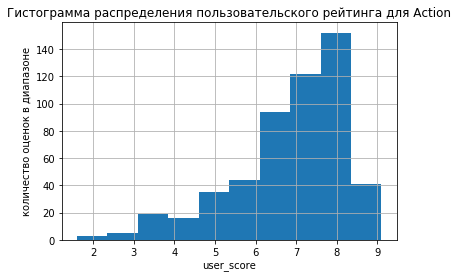

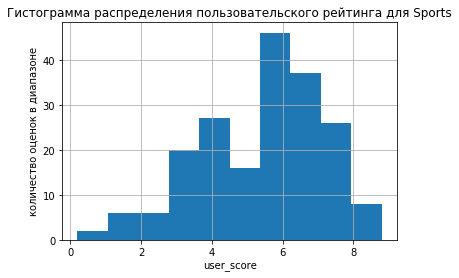

Дисперсия для Action:  user_score    1.881917
dtype: float64
Дисперсия для sports:  user_score    3.038543
dtype: float64
p-value =  [3.31837307e-20]
Отвергаем нулевую гипотезу


In [44]:
#получим наборы данных с пользовательским рейтингом для жанров:
#из анализа исключаем строки, где user_score еще не определен (мы заменяли tbd на 100) и там, где это значение не указано (заменяли нулями)
games_action_rating = games.query('year_of_release > @actual_year_border and genre == "action" and user_score < 100 and user_score > 0')[['user_score']]
games_sports_rating = games.query('year_of_release > @actual_year_border and genre == "sports" and user_score < 100 and user_score > 0')[['user_score']]

#Построим гистограммы, чтобы убедиться, что распределение похоже на нормальное
games_action_rating.hist(bins = 10)
plt.title('Гистограмма распределения пользовательского рейтинга для Action')
plt.xlabel('user_score')
plt.ylabel('количество оценок в диапазоне')
plt.show()

games_sports_rating.hist(bins = 10)
plt.title('Гистограмма распределения пользовательского рейтинга для Sports')
plt.xlabel('user_score')
plt.ylabel('количество оценок в диапазоне')
plt.show()

#проверим дисперсии обеих выборок на равенство:
print('Дисперсия для Action: ',games_action_rating.var())
print('Дисперсия для sports: ',games_sports_rating.var())
alpha = 0.05 #зададим критический уровень значимости
#значения дисперсий достаточно близкие, но все-таки равными из назвать сложно, поэтому проведемм тест Критерй Стьюдента с учетом этого
results = st.ttest_ind(games_action_rating,games_sports_rating,equal_var = False)
print('p-value = ',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удлось отвергнуть нулевую гипотезу')


<b>Вывод:</b><br>
Распределение пользовательских оценок для жанров Action и Sports похоже на нормальное, поэтому можем применить критерий Стьюдента для проверки нулевой гипотезы. Дисперсии для выборок отличаются очень сильно, это необхлдимо учесть при проведении анализа (задаем equal_var = False)<br>
Значение p-value во много раз меньше порогового значения alpha, это значит, что мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports, и принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги для жанров Action и Sports различны.

<h1>Общий вывод</h1>

1. В данных содержится достаточно большое количество пропусков и ошибок: пропущено много значений в столбце year_of_release и столбцах рейтинга. В столбце name обнаружены "похожие" значения: для одних и тех же игр продажи по разным регионам были вынесены в отдельные строки. Это формирует неявное дублирование данных. Были рассчитаны суммарные продажи по всем регионам
2. В ходе анализа выяснилось, что полный жизненный цикл платформы - около 10 лет, из которых наиболее активно она используется только 5-6 лет (исключение составляет платформа PC). Исходя из этой информации был определен актуальный период для проведения анализа - с 2012 года. 
3. По объемам продаж лидируют платформы: X360, Wii,XOne,PS4,PS3,WiiU
4. Нет прямой зависимости продаж от оценки критиков. Критики ставят свою оценку уже после выхода игры, когда уже есть определенный объем продаж. Их оценки могут поднять продажи только если они очеь высокие, и то пользователи ориентируются не только на них, но еще на оценки пользователей и на рекламу. Также нет прямой зависимости продаж от оценки пользователей: пользователи ее ставят уже после приобретения игры, и пользователи, которые купили игру позже, могут оценить ее ниже, чем те, кто купил раньше.
5. Наиболее доходные жанры - action, shooter, role-playing, sports, misc. Но качество продаж отличается. Например, в action очень много совсем недоходных игр, но за счет того, что их очень много, а также есть некоторое количество очень доходных - жанр является самым доходным. Shooter же, наоборот, самих игр гораздо меньше, но при этом там намного меньшую долю составляют недоходные игры. Аналогично sports. То есть при планировании выпуска новой игры и рекламной кампании необходимо анализировать ЦА и вероятность того, что игра окажется малодоходной в своем жанре
6. Типичный портрет пользователя Северной Америки похож на типичный портрет пользователя Европы, однако очень отличается от типичного портрета пользователя из Японии. 
   Во-первых, предпочтения по платформам (в Америке и Европе просто немого отличается степень популярноси одних и тех же платформ, в Японии же рейтинг выглядит совсем иначе, хотя PlayStation везде популярны):  
    - В Северной Америке (по степени популярности, по убыванию): X360,PS4,PS3,XOne,3DS
    - В Европе (по степени популярности, по убыванию): PS4,PS3,X360,XOne,3DS
    - В Японии (по степени популярности, по убыванию): 3DS, PS3, PSV, PS4,WiiU.
   Во-вторых, предпочтения по жанрам (В Америке и Европе рейтинг почти одинаков, за исключением пятого. В Японии же он выглядит совсем иначе. Хотя во всех регионах популярны action и role-playing):  
    - Самые популярные жанры в Северной Америке - action,shooter, sports, role-playing, misc.
    - Самые популярные жанры в Европе - action,shooter, sports, role-playing, racing.
    - Самые популярные жанры в Японии - role-playing, action, misc, simulation, fighting.
   В-третьих, распределение возрастной категории пользовтелей:
    - В Европе и Америке самая большая (и с большим отрывом) популярность у игр для взрослых, на втором месте по популярности 0 игры для всей семьи, и только потом игры для детей от 10 лет и подростков. 
    - В Японии же наиболее популярны игры "для всех" и "для подростков от 13 лет", игры для взрослых только на 3 месте. Это говорит о том, что здесь больше стоит ориентироваться на более молодую аудиторию
    
7. Гипотеза "Сердние пользовательские рейтинги платформ Xbox One и PC одинаковые" была принята
8. Гипотеза "средние пользовательские рейтинги для жанров Action и Sports различны" была принята

Все это говорит о том, что при планировании нового продукта и рекламной кампании в Северной Америке и Европе можно ориентироваться на новые платформы XOne, PS4, 3DS (X360 и PS3 уже завершают свой жизненный цикл), также стоит ориентироваться на наиболее популярные жанры: action,shooter, sports, role-playing, racing, misc. (последние два актуально только для Европы и Северной Америки соответственно). Однако необходимо учитывать вероятность того, что игра окажется неприбыльной: например,в  жанре action это очень возможно: там очень много малоприбыльных игр, но при этом есть очень прибыльные. то есть в этом жанре, скорее всего, попадешь в одну из крайностей. Жанры shooter и sports чуть более предсказуемы: здесь намного меньше малоприбыльных игр, и само стандартное отклонение меньше, то есть больше шансов получить неплохую прибыль. Также при планировании новых продуктов и рекламной кампании стоит учитывать, что в Европе и Америке наиболее популярны игры для взрослых, но уже на втором месте (с большим отрывом) игры для всей семьи. <br>
В Японии же картина совсем другая, там наиболее популярны платформы 3DS, PlayStation, WiiU, а также иначе распределены жанры и Целевая аудиторрия: наиболее популярны игры "для всех" и "для подростков от 13 лет". То есть для игр, подходящих под эти критерии, можно больше ориентировать рекламную кампанию на японскую молодежь.<br>
Также при проведении рекламной кампании и планировании новых продуктов можно ориентироваться на принятые гипотезы:<br>
  "Сердние пользовательские рейтинги платформ Xbox One и PC одинаковые": игры, успешные на Xbox также могут быть популярны на PC и наоборот. <br>
  "Средние пользовательские рейтинги для жанров Action и Sports различны": делая выбор в пользу одного из жанров можно ориентироваться на данные о его пользовательских рейтингах.

 

